In [ ]:

import geopandas as gpd
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

paradas_path = '/content/drive/MyDrive/Tesis/Datos/v_paradas_suburbanos.shp'

paradas = gpd.read_file(paradas_path)
paradas.head()

Mounted at /content/drive


gid codigo          descrip   calle_1         calle_2  km observ cartel  \
0  5306  15001  TERMINAL B.BRUM   GALICIA      RIO BRANCO NaN   None     SD   
1  5307  15031        RIO NEGRO  PAYSANDU       RIO NEGRO NaN   None     SD   
2  5308  15032   AV. LIBERTADOR  PAYSANDU  AV. LIBERTADOR NaN   None     SD   
3  5309  15033         YAGUARON  PAYSANDU        YAGUARON NaN   None     SD   
4  5310  15034            EJIDO  PAYSANDU           EJIDO NaN   None     SD   

  refugio                                             lineas  \
0      SD  10A-11A-11C-14A-14AB-14AR-15A-15B-1A-1M1-1M11-...   
1      SD  11A-15A-15B-214-221-222-268-6A-6R6-700-701-702...   
2      SD  10A-11A-11C-14A-14AB-14AR-15A-15B-1A-1M8-268-2...   
3      SD  11A-11C-15A-15B-214-221-222-6A-6B-6R6-700-701-...   
4      SD  10A-11A-11C-14A-14AB-14AR-15A-15B-1A-1M8-230D-...   

                      geometry  
0  POINT (-56.19659 -34.90013)  
1  POINT (-56.19423 -34.90238)  
2  POINT (-56.19305 -34.90229)  
3  POINT (-56.18862 -34.90197)  
4   POINT (-56.1875 -34.90187)

In [ ]:
paradas.columns

Index(['gid', 'codigo', 'descrip', 'calle_1', 'calle_2', 'km', 'observ',
       'cartel', 'refugio', 'lineas', 'geometry'],
      dtype='object')

In [ ]:
localidades_path = '/content/drive/MyDrive/Tesis/Datos/merged_localidades.csv'

localidades = pd.read_csv(localidades_path)
localidades.head()

LOCALIDAD_CODE  DEPARTAMENTO     size  DPTOLOC_COD  LOC_NOMBRE  \
0            1020             1  1287452         1020  MONTEVIDEO   
1           15120            15   114084        15120       SALTO   
2           10020            10   102000        10020   MALDONADO   
3           13020            13    84775        13020      RIVERA   
4           11120            11    81550        11120    PAYSANDU   

   DPTO_CODIGO DPTO_NOMBRE        LAT        LON  
0            1  Montevideo -34.905892 -56.191310  
1           15       Salto -31.388890 -57.960888  
2           10   Maldonado -34.908716 -54.958272  
3           13      Rivera -30.900058 -55.540815  
4           11    Paysandú -32.321726 -58.089214

In [ ]:
localidades = gpd.read_file('/content/drive/MyDrive/Tesis/Datos/merged_localidades.csv')
localidades.head()

LOCALIDAD_CODE DEPARTAMENTO     size DPTOLOC_COD  LOC_NOMBRE DPTO_CODIGO  \
0          01020           01  1287452       01020  MONTEVIDEO          01   
1          15120           15   114084       15120       SALTO          15   
2          10020           10   102000       10020   MALDONADO          10   
3          13020           13    84775       13020      RIVERA          13   
4          11120           11    81550       11120    PAYSANDU          11   

  DPTO_NOMBRE          LAT          LON  
0  Montevideo  -34.9058916  -56.1913095  
1       Salto    -31.38889  -57.9608876  
2   Maldonado  -34.9087162  -54.9582718  
3      Rivera   -30.900058  -55.5408151  
4    Paysandú  -32.3217257  -58.0892136

In [ ]:
# Convert the 'LAT' column to numeric, coercing errors to NaN
localidades['LAT'] = pd.to_numeric(localidades['LAT'], errors='coerce')

# Filter rows where 'LAT' is less than -1, dropping rows with NaN in LAT
localidades_filtered = localidades[localidades["LAT"] < -1].dropna(subset=['LAT'])

localidades_filtered

LOCALIDAD_CODE DEPARTAMENTO     size DPTOLOC_COD          LOC_NOMBRE  \
0            01020           01  1287452       01020          MONTEVIDEO   
1            15120           15   114084       15120               SALTO   
2            10020           10   102000       10020           MALDONADO   
3            13020           13    84775       13020              RIVERA   
4            11120           11    81550       11120            PAYSANDU   
..             ...          ...      ...         ...                 ...   
491          03991           03      105       03991         VILLA JUANA   
492          14926           14      104       14926       BARRIO TORRES   
493          05964           05      102       05964       PUERTO INGLES   
494          03996           03      102       03996  QUINTAS DEL BOSQUE   
495          05927           05      100       05927          EL ENSUEÑO   

    DPTO_CODIGO DPTO_NOMBRE        LAT          LON  
0            01  Montevideo -34.905892  -56.1913095  
1            15       Salto -31.388890  -57.9608876  
2            10   Maldonado -34.908716  -54.9582718  
3            13      Rivera -30.900058  -55.5408151  
4            11    Paysandú -32.321726  -58.0892136  
..          ...         ...        ...          ...  
491          03   Canelones -34.776172  -55.8940367  
492          14       Rocha -34.211784  -53.8455919  
493          05     Colonia -34.203277   -58.066059  
494          03   Canelones -34.819497  -55.9904998  
495          05     Colonia -34.421706  -57.6031661  

[462 rows x 9 columns]

In [ ]:
print(localidades.shape[0])
print(localidades_filtered.shape[0])

496
462


In [ ]:
camineraia_nacional_path = '/content/drive/MyDrive/Tesis/Datos/v_camineria_nacional.shp'
camineria = gpd.read_file(camineraia_nacional_path)
camineria.head()

gid     codigo  numero                        nombre depto  \
0  3344250  UY0110000    11.0         José Batlle y Ordoñez  UYCA   
1   349731  UY0110000    11.0         José Batlle y Ordoñez  UYCA   
2   292738  UY0270000    27.0                   Mario Heber  UYRV   
3   305834  UY0050000     5.0  Brig. Gral. Fructuoso Rivera  UYMO   
4  3343102   UYTA0284     NaN                          None  UYTA   

    jurisdicci                categoria  \
0     NACIONAL   CORREDOR INTERNACIONAL   
1     NACIONAL   CORREDOR INTERNACIONAL   
2     NACIONAL          RUTA SECUNDARIA   
3     NACIONAL   CORREDOR INTERNACIONAL   
4  SIN DEFINIR  CAMINERÍA DEPARTAMENTAL   

                                             sentido carriles        calzada  \
0  EL SENTIDO DE CIRCULACIÓN COINCIDE CON EL DE D...        1  SE VE CALZADA   
1                      CIRCULACIÓN EN AMBOS SENTIDOS        2  SE VE CALZADA   
2                      CIRCULACIÓN EN AMBOS SENTIDOS        2  SE VE CALZADA   
3  EL SENTIDO DE CIRCULACIÓN COINCIDE CON EL DE D...        2  SE VE CALZADA   
4                      CIRCULACIÓN EN AMBOS SENTIDOS       99   SE VE HUELLA   

  fuente observacio nat_juridi  \
0    VFN       7-11       None   
1    VFN       None       None   
2    VFN       None       None   
3    VFN       None       None   
4    VFN       None       None   

                                            geometry  
0  LINESTRING (-55.87298 -34.54738, -55.87303 -34...  
1  LINESTRING (-56.0249 -34.51454, -56.02669 -34....  
2  LINESTRING (-55.49775 -31.0364, -55.47293 -31....  
3  LINESTRING (-56.27475 -34.78458, -56.27479 -34...  
4  LINESTRING (-55.88549 -31.79666, -55.88545 -31...

In [ ]:
import geopandas as gpd

# Ensure LAT and LON are numeric (already done in a previous cell but good to be safe)
localidades['LAT'] = pd.to_numeric(localidades['LAT'], errors='coerce')
localidades['LON'] = pd.to_numeric(localidades['LON'], errors='coerce')

# Drop rows where LAT or LON are NaN after coercion
localidades_with_coords = localidades.dropna(subset=['LAT', 'LON']).copy()

# Create a GeoDataFrame from the filtered DataFrame
# Assuming the coordinates are in WGS84 (EPSG:4326)
localidades_gdf = gpd.GeoDataFrame(
    localidades_with_coords,
    geometry=gpd.points_from_xy(localidades_with_coords.LON, localidades_with_coords.LAT),
    crs="EPSG:4326"
)
localidades_gdf.drop(columns=['LON', 'LAT'], inplace=True)

localidades_gdf.head()

LOCALIDAD_CODE DEPARTAMENTO     size DPTOLOC_COD  LOC_NOMBRE DPTO_CODIGO  \
0          01020           01  1287452       01020  MONTEVIDEO          01   
1          15120           15   114084       15120       SALTO          15   
2          10020           10   102000       10020   MALDONADO          10   
3          13020           13    84775       13020      RIVERA          13   
4          11120           11    81550       11120    PAYSANDU          11   

  DPTO_NOMBRE                     geometry  
0  Montevideo  POINT (-56.19131 -34.90589)  
1       Salto  POINT (-57.96089 -31.38889)  
2   Maldonado  POINT (-54.95827 -34.90872)  
3      Rivera  POINT (-55.54082 -30.90006)  
4    Paysandú  POINT (-58.08921 -32.32173)

In [ ]:
print("cantidad de localidades",localidades_gdf.shape[0])
print("cantidad de paradas",paradas.shape[0])
print("cantidad de rutas",len(camineria["numero"].unique()))


cantidad de localidades 462
cantidad de paradas 5674
cantidad de rutas 126


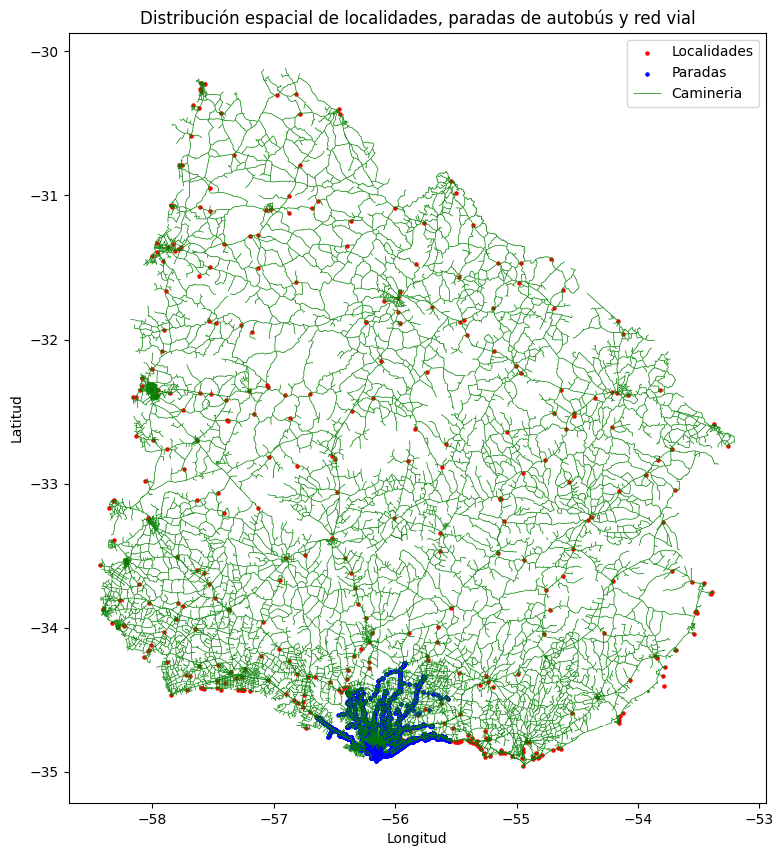

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot each GeoDataFrame with a different color and label
localidades_gdf.plot(ax=ax, color='red', label='Localidades', markersize=5)
paradas.plot(ax=ax, color='blue', label='Paradas', markersize=5)
camineria.plot(ax=ax, color='green', label='Camineria', linewidth=0.5)

# Add a legend and title
ax.set_title('Distribución espacial de localidades, paradas de autobús y red vial')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.legend()

# Show the plot
plt.show()

#Comentarios

* Considerar todas las localidades, no solo las de menos de 5 mil habitantes.
* Las paradas parece que son solo en zona metropolitana, capaz que no es util, considerar otro dataset (arreglado usando los datos de overpass)
* Considerar todas las rutas como en el mapa en verde, util para medir las distancias, se puede pedir como requerimiento que las paradas se ubiquen sobre ciertas rutas para el scoring.

In [ ]:
import geopandas as gpd

paradas_omnibus_path = '/content/drive/MyDrive/Tesis/Datos/Paradas_omnibus_UY.geojson'

paradas_omnibus = gpd.read_file(paradas_omnibus_path)

In [ ]:
paradas_omnibus.columns

Index(['id', '@id', 'addr:city', 'addr:country', 'addr:housenumber',
       'addr:street', 'amenity', 'bench', 'bin', 'bus', 'bus_stop:category',
       'check_date:bench', 'check_date:shelter', 'covered', 'departures_board',
       'description', 'highway', 'internet_access', 'lit', 'mapillary',
       'mvdgis:cod_nombre', 'mvdgis:cod_varian', 'mvdgis:desc_linea',
       'mvdgis:ordinal', 'mvdgis:padron', 'mvdgis:source', 'name', 'name:de',
       'name:en', 'name:es', 'name:signed', 'network', 'network:wikidata',
       'network:wikipedia', 'noname', 'not:network:wikidata', 'note',
       'operator', 'owner', 'passenger_information_display', 'phone',
       'public_transport', 'ref', 'route_ref', 'shelter', 'shelter_type',
       'source', 'source:pkey', 'survey:date', 'tactile_paving', 'wheelchair',
       'geometry'],
      dtype='object')

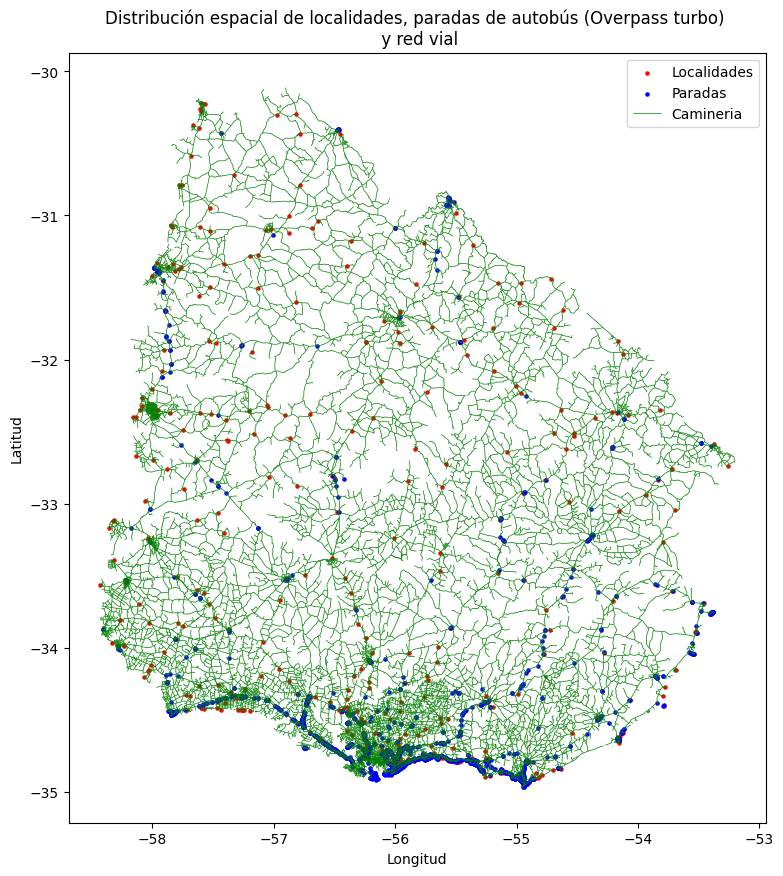

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot each GeoDataFrame with a different color and label
localidades_gdf.plot(ax=ax, color='red', label='Localidades', markersize=5)
paradas_omnibus.plot(ax=ax, color='blue', label='Paradas', markersize=5)
camineria.plot(ax=ax, color='green', label='Camineria', linewidth=0.5)

# Add a legend and title
ax.set_title('Distribución espacial de localidades, paradas de autobús (Overpass turbo) \n y red vial')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.legend()

# Show the plot
plt.show()

In [ ]:
paradas_omnibus["route_ref"].unique()


array([None, 'CA1'], dtype=object)

# identificacion de paradas

In [ ]:
import requests

def pedir_imagen(lat, lon, z):
  TOKEN = ""
  for i in range(15,19):
    lat, lon = lat, lon
    zoom, width, height = z, 512, 512
    url = (
        f"https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/"
        f"{lon},{lat},{zoom}/{width}x{height}"
        f"?access_token={TOKEN}"
    )

    resp = requests.get(url)
    assert resp.status_code == 200, f"Error HTTP {resp.status_code}"
    return resp.content

In [ ]:
import os

# Carpeta donde se guardarán las imágenes
output_dir = '/content/paradas_images'
os.makedirs(output_dir, exist_ok=True)


In [ ]:
# Define the zoom levels to download
zoom_levels = [15, 16, 17, 18, 19]

# Iterate through the example stops
for i, stop in paradas_omnibus.iterrows():
    lat = stop.geometry.y
    lon = stop.geometry.x

    # Iterate through the zoom levels
    for z in zoom_levels:
        try:
            print(f"Attempting to download image for Stop {i} at zoom level {z}...")
            image_content = pedir_imagen(lat, lon, z)

            # Save the image
            # ...
            filename = os.path.join(output_dir, f"stop_{i}_zoom_{z}.png")
            with open(filename, "wb") as f:
                f.write(image_content)
            print(f"Downloaded: {filename}")

        except Exception as e:
            print(f"Could not download image for Stop {i} at zoom level {z}: {e}")

print("\nFinished attempting to download images for example stops.")

Streaming output truncated to the last 5000 lines.
Attempting to download image for Stop 1251 at zoom level 16...
Downloaded: /content/paradas_images/stop_1251_zoom_16.png
Attempting to download image for Stop 1251 at zoom level 17...
Downloaded: /content/paradas_images/stop_1251_zoom_17.png
Attempting to download image for Stop 1251 at zoom level 18...
Downloaded: /content/paradas_images/stop_1251_zoom_18.png
Attempting to download image for Stop 1251 at zoom level 19...
Downloaded: /content/paradas_images/stop_1251_zoom_19.png
Attempting to download image for Stop 1252 at zoom level 15...
Downloaded: /content/paradas_images/stop_1252_zoom_15.png
Attempting to download image for Stop 1252 at zoom level 16...
Downloaded: /content/paradas_images/stop_1252_zoom_16.png
Attempting to download image for Stop 1252 at zoom level 17...
Downloaded: /content/paradas_images/stop_1252_zoom_17.png
Attempting to download image for Stop 1252 at zoom level 18...
Downloaded: /content/paradas_images/sto

In [ ]:
import os
from google.colab import files
import shutil

folder_path = '/content/paradas_images'
zip_path = '/content/paradas_images.zip'

# Check if the folder exists
if os.path.exists(folder_path):
    print(f"Compressing folder: {folder_path}")
    # Create a zip archive of the folder
    shutil.make_archive(folder_path, 'zip', folder_path)
    print(f"Created zip file: {zip_path}")

    # Download the zip file
    print(f"Downloading {zip_path}...")
    files.download(zip_path)
    print("Download initiated.")
else:
    print(f"Error: Folder not found at {folder_path}. Please verify the path.")

Compressing folder: /content/paradas_images
Created zip file: /content/paradas_images.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download initiated.


# Task
Filter the `camineria` GeoDataFrame to include only 'CORREDOR INTERNACIONAL' entries, then create a map visualizing `localidades_gdf`, `paradas_omnibus`, and the filtered `camineria` with a legend and title, and finally add comments explaining the map and the importance of international corridors.

## Filtrar Caminería por Categoría

### Subtask:
Filtrar el GeoDataFrame `camineria` para conservar solo las entradas donde la columna `categoria` sea 'CORREDOR INTERNACIONAL'.


**Reasoning**:
The subtask requires filtering the `camineria` GeoDataFrame based on the 'categoria' column. I will use boolean indexing to select rows where 'categoria' is 'CORREDOR INTERNACIONAL' and store the result in a new GeoDataFrame.



In [ ]:
camineria_corredores = camineria[camineria['categoria'] == 'CORREDOR INTERNACIONAL']

print(f"Original camineria shape: {camineria.shape}")
print(f"Filtered camineria_corredores shape: {camineria_corredores.shape}")
camineria_corredores.head()

Original camineria shape: (40058, 14)
Filtered camineria_corredores shape: (3385, 14)


gid     codigo  numero                         nombre depto jurisdicci  \
0  3344250  UY0110000    11.0          José Batlle y Ordoñez  UYCA   NACIONAL   
1   349731  UY0110000    11.0          José Batlle y Ordoñez  UYCA   NACIONAL   
3   305834  UY0050000     5.0   Brig. Gral. Fructuoso Rivera  UYMO   NACIONAL   
5   349583  UY0080000     8.0  Brig. Gral. Juan A. Lavalleja  UYCA   NACIONAL   
6   349475  UY0050000     5.0   Brig. Gral. Fructuoso Rivera  UYCA   NACIONAL   

                categoria                                            sentido  \
0  CORREDOR INTERNACIONAL  EL SENTIDO DE CIRCULACIÓN COINCIDE CON EL DE D...   
1  CORREDOR INTERNACIONAL                      CIRCULACIÓN EN AMBOS SENTIDOS   
3  CORREDOR INTERNACIONAL  EL SENTIDO DE CIRCULACIÓN COINCIDE CON EL DE D...   
5  CORREDOR INTERNACIONAL  EL SENTIDO DE CIRCULACIÓN COINCIDE CON EL DE D...   
6  CORREDOR INTERNACIONAL  EL SENTIDO DE CIRCULACIÓN COINCIDE CON EL DE D...   

  carriles        calzada fuente observacio nat_juridi  \
0        1  SE VE CALZADA    VFN       7-11       None   
1        2  SE VE CALZADA    VFN       None       None   
3        2  SE VE CALZADA    VFN       None       None   
5        2  SE VE CALZADA    VFN      8-101       None   
6        2  SE VE CALZADA    VFN       None       None   

                                            geometry  
0  LINESTRING (-55.87298 -34.54738, -55.87303 -34...  
1  LINESTRING (-56.0249 -34.51454, -56.02669 -34....  
3  LINESTRING (-56.27475 -34.78458, -56.27479 -34...  
5  LINESTRING (-55.97549 -34.73424, -55.97567 -34...  
6  LINESTRING (-56.26215 -34.59394, -56.26218 -34...

In [ ]:
# Proyectamos paradas y caminería a UTM 21S (EPSG:32721)
paradas_m = paradas_omnibus.to_crs(32721)
camineria_corr_m = camineria_corredores.to_crs(32721)

paradas_m.crs, camineria_corr_m.crs

(<Projected CRS: EPSG:32721>
 Name: WGS 84 / UTM zone 21S
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - name: Between 60°W and 54°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Falkland Islands (Malvinas). Paraguay. Uruguay.
 - bounds: (-60.0, -80.0, -54.0, 0.0)
 Coordinate Operation:
 - name: UTM zone 21S
 - method: Transverse Mercator
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Projected CRS: EPSG:32721>
 Name: WGS 84 / UTM zone 21S
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - name: Between 60°W and 54°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Falkland Islands (Malvinas). Paraguay. Uruguay.
 - bounds: (-60.0, -80.0, -54.0, 0.0)
 Coordinate Operation:
 - name: UTM zone 21S
 - method: Transverse Mercator
 Datum: World Geo

In [ ]:
# Proyectamos paradas y caminería a UTM 21S (EPSG:32721)
paradas_m = paradas_omnibus.to_crs(32721)
camineria_corr_m = camineria_corredores.to_crs(32721)

paradas_m.crs, camineria_corr_m.crs

(<Projected CRS: EPSG:32721>
 Name: WGS 84 / UTM zone 21S
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - name: Between 60°W and 54°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Falkland Islands (Malvinas). Paraguay. Uruguay.
 - bounds: (-60.0, -80.0, -54.0, 0.0)
 Coordinate Operation:
 - name: UTM zone 21S
 - method: Transverse Mercator
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Projected CRS: EPSG:32721>
 Name: WGS 84 / UTM zone 21S
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - name: Between 60°W and 54°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Falkland Islands (Malvinas). Paraguay. Uruguay.
 - bounds: (-60.0, -80.0, -54.0, 0.0)
 Coordinate Operation:
 - name: UTM zone 21S
 - method: Transverse Mercator
 Datum: World Geo

In [ ]:
paradas_corr = gpd.sjoin_nearest(
    paradas_m,
    camineria_corr_m,
    how="left",
    distance_col="dist_ruta_m"
)

paradas_corr.head()


id             @id addr:city addr:country addr:housenumber  \
0  node/415524586  node/415524586      None         None             None   
1  node/455062576  node/455062576      None         None             None   
2  node/460420033  node/460420033      None         None             None   
3  node/460420060  node/460420060      None         None             None   
4  node/460421263  node/460421263      None         None             None   

  addr:street amenity bench   bin   bus  ... depto jurisdicci  \
0        None    None   yes  None  None  ...  UYRV   NACIONAL   
1        None    None    no  None  None  ...  UYCA   NACIONAL   
2        None    None  None  None   yes  ...  UYSJ   NACIONAL   
3        None    None  None  None   yes  ...  UYSJ   NACIONAL   
4        None    None  None  None   yes  ...  UYSJ   NACIONAL   

                categoria                                            sentido  \
0  CORREDOR INTERNACIONAL                      CIRCULACIÓN EN AMBOS SENTIDOS   
1  CORREDOR INTERNACIONAL  EL SENTIDO DE CIRCULACIÓN COINCIDE CON EL DE D...   
2  CORREDOR INTERNACIONAL  EL SENTIDO DE CIRCULACIÓN COINCIDE CON EL DE D...   
3  CORREDOR INTERNACIONAL  EL SENTIDO DE CIRCULACIÓN COINCIDE CON EL DE D...   
4  CORREDOR INTERNACIONAL  EL SENTIDO DE CIRCULACIÓN COINCIDE CON EL DE D...   

  carriles        calzada      fuente observacio nat_juridi  dist_ruta_m  
0        2  SE VE CALZADA         VFN       None       None     0.719005  
1        1  SE VE CALZADA  IMAGEN WEB       None       None   957.785353  
2        2  SE VE CALZADA         VFN       None       None  7326.519715  
3        2  SE VE CALZADA         VFN       None       None  7803.279688  
4        2  SE VE CALZADA         VFN       None       None  8111.166387  

[5 rows x 67 columns]

In [ ]:
cam_corr_geom = camineria_corr_m[["numero", "geometry"]].copy()


In [ ]:
paradas_corr = gpd.sjoin_nearest(
    paradas_m,
    cam_corr_geom,
    how="left",
    distance_col="dist_ruta_m"
)



In [ ]:
UMBRAL_DISTANCIA_M = 1000

paradas_corr_near = paradas_corr[paradas_corr["dist_ruta_m"] <= UMBRAL_DISTANCIA_M].copy()

print("Paradas totales:", len(paradas_corr))
print("Paradas sobre corredores internacionales (<=200 m):", len(paradas_corr_near))


Paradas totales: 1805
Paradas sobre corredores internacionales (<=200 m): 569


In [ ]:
print(paradas_corr_near.columns)


Index(['id', '@id', 'addr:city', 'addr:country', 'addr:housenumber',
       'addr:street', 'amenity', 'bench', 'bin', 'bus', 'bus_stop:category',
       'check_date:bench', 'check_date:shelter', 'covered', 'departures_board',
       'description', 'highway', 'internet_access', 'lit', 'mapillary',
       'mvdgis:cod_nombre', 'mvdgis:cod_varian', 'mvdgis:desc_linea',
       'mvdgis:ordinal', 'mvdgis:padron', 'mvdgis:source', 'name', 'name:de',
       'name:en', 'name:es', 'name:signed', 'network', 'network:wikidata',
       'network:wikipedia', 'noname', 'not:network:wikidata', 'note',
       'operator', 'owner', 'passenger_information_display', 'phone',
       'public_transport', 'ref', 'route_ref', 'shelter', 'shelter_type',
       'source', 'source:pkey', 'survey:date', 'tactile_paving', 'wheelchair',
       'geometry', 'index_right', 'numero', 'dist_ruta_m'],
      dtype='object')


In [ ]:
paradas_valid = paradas_corr_near.rename(columns={"numero_right": "numero"}).copy()


paradas_corr = gpd.sjoin_nearest(
    paradas_m,
    cam_corr_geom,
    how="left",
    distance_col="dist_ruta_m"
)



In [ ]:
azules = sns.color_palette("Blues", 4).as_hex()
camineria_corredores        # en el CRS original (probablemente 4326)
cam_corr_m = camineria_corredores.to_crs(32721)  # en metros
paradas_corr_near           # también en 32721



id               @id addr:city addr:country  \
0       node/415524586    node/415524586      None         None   
1       node/455062576    node/455062576      None         None   
30     node/1302650021   node/1302650021      None         None   
31     node/1302650023   node/1302650023      None         None   
33     node/1302650035   node/1302650035      None         None   
...                ...               ...       ...          ...   
1735  node/12782810756  node/12782810756      None         None   
1736  node/12805663552  node/12805663552      None         None   
1737  node/12805663553  node/12805663553      None         None   
1738  node/12805663554  node/12805663554      None         None   
1739  node/12805663555  node/12805663555      None         None   

     addr:housenumber addr:street amenity bench   bin   bus  ... shelter_type  \
0                None        None    None   yes  None  None  ...         None   
1                None        None    None    no  None  None  ...         None   
30               None        None    None  None  None   yes  ...         None   
31               None        None    None  None  None   yes  ...         None   
33               None        None    None  None  None   yes  ...         None   
...               ...         ...     ...   ...   ...   ...  ...          ...   
1735             None        None    None   yes  None  None  ...         None   
1736             None        None    None  None  None   yes  ...         None   
1737             None        None    None  None  None   yes  ...         None   
1738             None        None    None  None  None   yes  ...         None   
1739             None        None    None  None  None   yes  ...         None   

     source source:pkey survey:date tactile_paving wheelchair  \
0      None        None         NaT             no       None   
1      None        None         NaT           None       None   
30     None        None         NaT           None       None   
31     None        None         NaT           None       None   
33     None        None         NaT           None       None   
...     ...         ...         ...            ...        ...   
1735   None        None         NaT           None       None   
1736   None        None         NaT           None       None   
1737   None        None         NaT           None       None   
1738   None        None         NaT           None       None   
1739   None        None         NaT           None       None   

                            geometry index_right numero dist_ruta_m  
0     POINT (627783.338 6527831.187)       15165    5.0    0.719005  
1     POINT (597140.644 6159372.044)       20351    8.0  957.785353  
30    POINT (565952.175 6179224.173)       12213    5.0  935.494560  
31    POINT (565977.287 6179506.825)         388   11.0  872.624493  
33     POINT (565896.45 6178622.724)       12213    5.0  920.638572  
...                              ...         ...    ...         ...  
1735  POINT (443242.667 6193007.195)       23390    1.0   15.034687  
1736    POINT (640735.27 6170995.15)        1792    8.0  780.526586  
1737  POINT (640750.529 6170970.669)        1792    8.0  803.881931  
1738  POINT (640541.749 6169794.915)         886    8.0  487.165061  
1739   POINT (640552.112 6169764.64)         886    8.0  464.616620  

[569 rows x 55 columns]

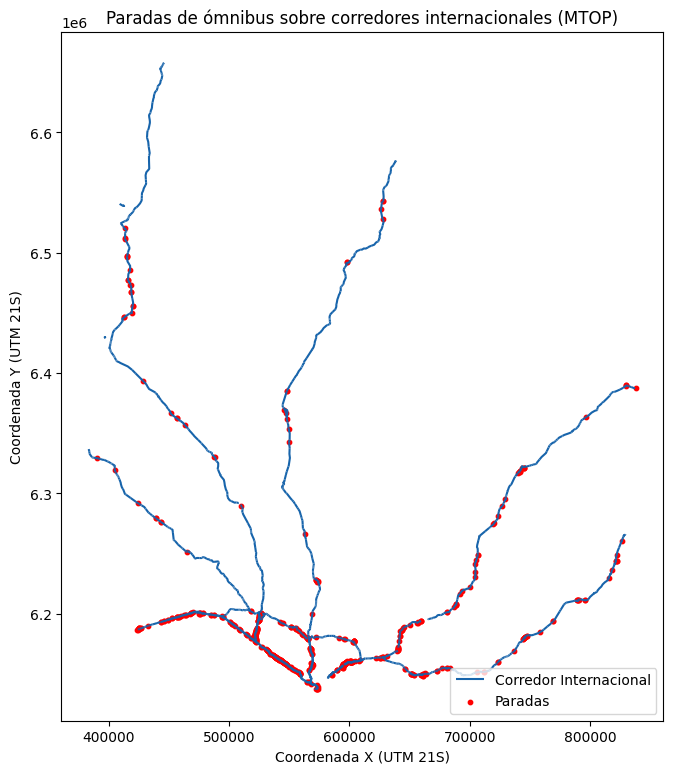

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Asegurar geometrías válidas y MISMO CRS
roads_valid = cam_corr_m[cam_corr_m.geometry.is_valid].copy()          # 👈 ojo acá
paradas_valid = paradas_corr_near[paradas_corr_near.geometry.is_valid].copy()

# 2) Paleta de azules
azules = sns.color_palette("Blues", 4).as_hex()

# 3) Plot
fig, ax = plt.subplots(figsize=(10, 8))

roads_valid.plot(
    ax=ax,
    color=azules[3],
    linewidth=1.5,
    label="Corredor Internacional"
)

paradas_valid.plot(
    ax=ax,
    color="red",
    markersize=10,
    label="Paradas"
)

# 4) Límites: usar ambos (rutas + paradas)
xmin_r, ymin_r, xmax_r, ymax_r = roads_valid.total_bounds
xmin_p, ymin_p, xmax_p, ymax_p = paradas_valid.total_bounds

xmin = min(xmin_r, xmin_p)
xmax = max(xmax_r, xmax_p)
ymin = min(ymin_r, ymin_p)
ymax = max(ymax_r, ymax_p)

pad_x = (xmax - xmin) * 0.05
pad_y = (ymax - ymin) * 0.05

ax.set_xlim(xmin - pad_x, xmax + pad_x)
ax.set_ylim(ymin - pad_y, ymax + pad_y)

ax.set_aspect("equal")

ax.set_title("Paradas de ómnibus sobre corredores internacionales (MTOP)")
ax.set_xlabel("Coordenada X (UTM 21S)")
ax.set_ylabel("Coordenada Y (UTM 21S)")
ax.legend(loc="lower right")

plt.tight_layout()
plt.show()


**Reasoning**:
The previous code failed because the `camineria` GeoDataFrame was not defined in the current execution context. I will include the loading of `camineria` from its file path before attempting to filter it, ensuring it is available.



/tmp/ipython-input-303896983.py:81: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc="lower right")


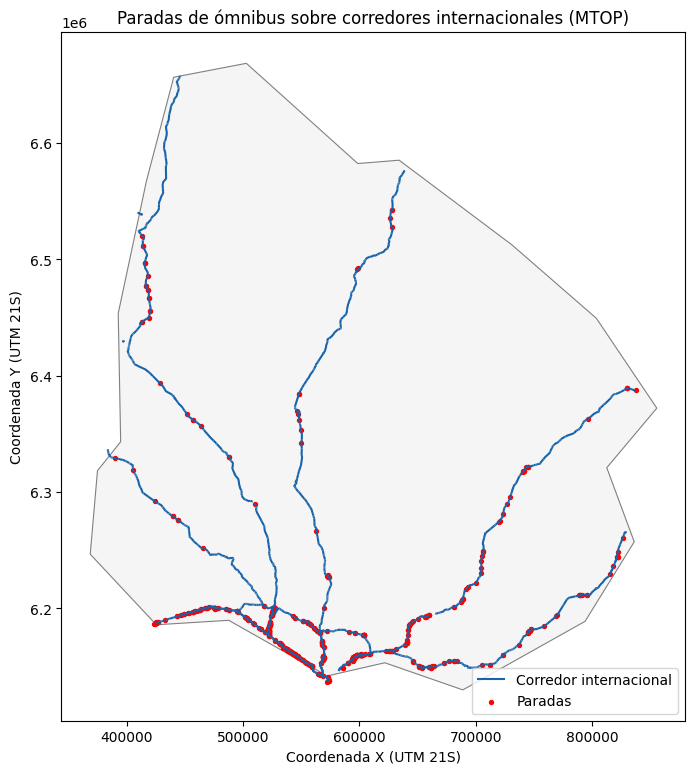

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1) Cargar Uruguay desde Natural Earth (mirror S3)
# ---------------------------
url_uruguay = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url_uruguay)

# revisá las columnas la primera vez si querés:
# world.columns

# En este dataset, la columna del país es "ADMIN"
uruguay = world[world["ADMIN"] == "Uruguay"]

# Pasar a UTM 21S
uruguay_32721 = uruguay.to_crs(32721)

# ---------------------------
# 2) Corredores y paradas en 32721
# ---------------------------
roads_valid = cam_corr_m[cam_corr_m.geometry.is_valid].copy()
paradas_valid = paradas_corr_near[paradas_corr_near.geometry.is_valid].copy()

azules = sns.color_palette("Blues", 4).as_hex()

# ---------------------------
# 3) Plot
# ---------------------------
fig, ax = plt.subplots(figsize=(10, 8))

# Uruguay base
uruguay_32721.plot(
    ax=ax,
    color="whitesmoke",
    edgecolor="gray",
    linewidth=0.8,
    label="Uruguay"
)

# Corredores
roads_valid.plot(
    ax=ax,
    color=azules[3],
    linewidth=1.5,
    label="Corredor internacional"
)

# Paradas
paradas_valid.plot(
    ax=ax,
    color="red",
    markersize=8,
    label="Paradas"
)

# ---------------------------
# 4) Ajuste de límites
# ---------------------------
xmin_u, ymin_u, xmax_u, ymax_u = uruguay_32721.total_bounds
xmin_r, ymin_r, xmax_r, ymax_r = roads_valid.total_bounds
xmin_p, ymin_p, xmax_p, ymax_p = paradas_valid.total_bounds

xmin = min(xmin_u, xmin_r, xmin_p)
xmax = max(xmax_u, xmax_r, xmax_p)
ymin = min(ymin_u, ymin_r, ymin_p)
ymax = max(ymax_u, ymax_r, ymax_p)

pad_x = (xmax - xmin) * 0.05
pad_y = (ymax - ymin) * 0.05

ax.set_xlim(xmin - pad_x, xmax + pad_x)
ax.set_ylim(ymin - pad_y, ymax + pad_y)

ax.set_aspect("equal")
ax.set_title("Paradas de ómnibus sobre corredores internacionales (MTOP)")
ax.set_xlabel("Coordenada X (UTM 21S)")
ax.set_ylabel("Coordenada Y (UTM 21S)")
ax.legend(loc="lower right")

plt.tight_layout()
plt.show()


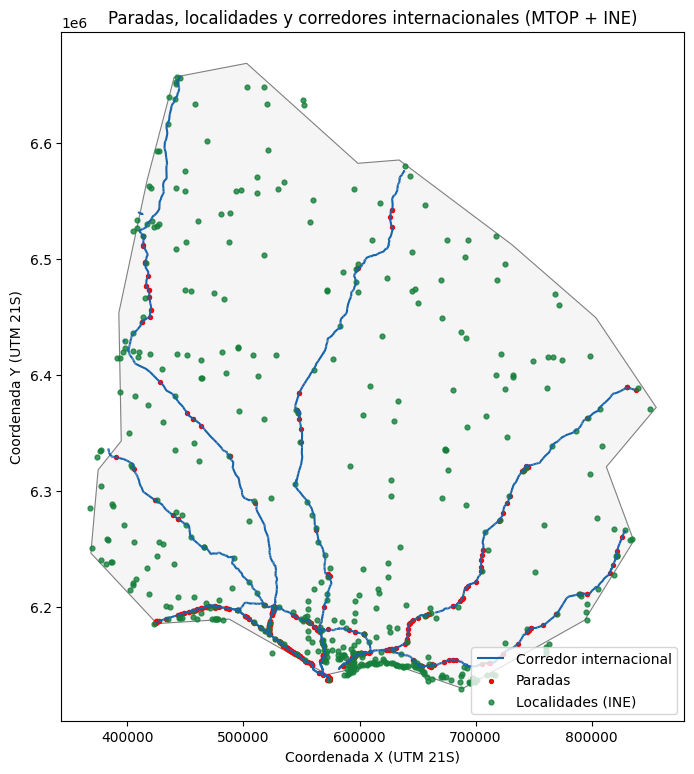

In [ ]:
# ---------------------------
# 3bis) Localidades en 32721
# ---------------------------
localidades_gdf = gpd.GeoDataFrame(
    localidades,
    geometry=gpd.points_from_xy(localidades["LON"], localidades["LAT"]),
    crs=4326
).to_crs(32721)

# paleta para localidades
verde = sns.color_palette("Greens", 4).as_hex()[3]

# ---------------------------
# Plot actualizado
# ---------------------------
fig, ax = plt.subplots(figsize=(10, 8))

# Uruguay base
uruguay_32721.plot(
    ax=ax,
    color="whitesmoke",
    edgecolor="gray",
    linewidth=0.8,
)

# Corredores
roads_valid.plot(
    ax=ax,
    color=azules[3],
    linewidth=1.5,
    label="Corredor internacional"
)

# Paradas
paradas_valid.plot(
    ax=ax,
    color="red",
    markersize=8,
    label="Paradas"
)

# Localidades
localidades_gdf.plot(
    ax=ax,
    color=verde,
    markersize=12,
    alpha=0.8,
    label="Localidades (INE)"
)

# Ajuste de límites
xmin = min(xmin_u, xmin_r, xmin_p, localidades_gdf.total_bounds[0])
xmax = max(xmax_u, xmax_r, xmax_p, localidades_gdf.total_bounds[2])
ymin = min(ymin_u, ymin_r, ymin_p, localidades_gdf.total_bounds[1])
ymax = max(ymax_u, ymax_r, ymax_p, localidades_gdf.total_bounds[3])

pad_x = (xmax - xmin) * 0.05
pad_y = (ymax - ymin) * 0.05

ax.set_xlim(xmin - pad_x, xmax + pad_x)
ax.set_ylim(ymin - pad_y, ymax + pad_y)

ax.set_aspect("equal")
ax.set_title("Paradas, localidades y corredores internacionales (MTOP + INE)")
ax.set_xlabel("Coordenada X (UTM 21S)")
ax.set_ylabel("Coordenada Y (UTM 21S)")
ax.legend(loc="lower right")

plt.tight_layout()
plt.show()


In [ ]:
paradas_corr_near

id               @id addr:city addr:country  \
0       node/415524586    node/415524586      None         None   
1       node/455062576    node/455062576      None         None   
30     node/1302650021   node/1302650021      None         None   
31     node/1302650023   node/1302650023      None         None   
33     node/1302650035   node/1302650035      None         None   
...                ...               ...       ...          ...   
1735  node/12782810756  node/12782810756      None         None   
1736  node/12805663552  node/12805663552      None         None   
1737  node/12805663553  node/12805663553      None         None   
1738  node/12805663554  node/12805663554      None         None   
1739  node/12805663555  node/12805663555      None         None   

     addr:housenumber addr:street amenity bench   bin   bus  ... shelter_type  \
0                None        None    None   yes  None  None  ...         None   
1                None        None    None    no  None  None  ...         None   
30               None        None    None  None  None   yes  ...         None   
31               None        None    None  None  None   yes  ...         None   
33               None        None    None  None  None   yes  ...         None   
...               ...         ...     ...   ...   ...   ...  ...          ...   
1735             None        None    None   yes  None  None  ...         None   
1736             None        None    None  None  None   yes  ...         None   
1737             None        None    None  None  None   yes  ...         None   
1738             None        None    None  None  None   yes  ...         None   
1739             None        None    None  None  None   yes  ...         None   

     source source:pkey survey:date tactile_paving wheelchair  \
0      None        None         NaT             no       None   
1      None        None         NaT           None       None   
30     None        None         NaT           None       None   
31     None        None         NaT           None       None   
33     None        None         NaT           None       None   
...     ...         ...         ...            ...        ...   
1735   None        None         NaT           None       None   
1736   None        None         NaT           None       None   
1737   None        None         NaT           None       None   
1738   None        None         NaT           None       None   
1739   None        None         NaT           None       None   

                            geometry index_right numero dist_ruta_m  
0     POINT (627783.338 6527831.187)       15165    5.0    0.719005  
1     POINT (597140.644 6159372.044)       20351    8.0  957.785353  
30    POINT (565952.175 6179224.173)       12213    5.0  935.494560  
31    POINT (565977.287 6179506.825)         388   11.0  872.624493  
33     POINT (565896.45 6178622.724)       12213    5.0  920.638572  
...                              ...         ...    ...         ...  
1735  POINT (443242.667 6193007.195)       23390    1.0   15.034687  
1736    POINT (640735.27 6170995.15)        1792    8.0  780.526586  
1737  POINT (640750.529 6170970.669)        1792    8.0  803.881931  
1738  POINT (640541.749 6169794.915)         886    8.0  487.165061  
1739   POINT (640552.112 6169764.64)         886    8.0  464.616620  

[569 rows x 55 columns]

In [ ]:
# @title Utilidades
import math
from dataclasses import dataclass
from typing import Tuple, Optional
from shapely.ops import unary_union, linemerge, snap
from shapely.geometry import LineString, MultiLineString, Point
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans

def _merged_route_line(roads: gpd.GeoDataFrame,S = 100)-> list:
    u = unary_union(roads.geometry.values)
    u = snap(u, u, S)       # cierra micro-gaps reales
    merged = linemerge(u)
    parts = merged.geoms if isinstance(merged, MultiLineString) else [merged]
    lines = sorted(list(merged.geoms), key=lambda g: (g.bounds[1], g.bounds[0]))
    return lines

def points_every(line, step) -> list:
    L = line.length
    d = 0.0
    pts = []
    while d <= L:
        pts.append(line.interpolate(d))
        d += step
    return pts

def _snap_point_to_line_and_m(point: Point, line) -> Tuple[Point, float]:
    """
    Snaps a point to a LineString or MultiLineString and returns the snapped point
    and the m-value (distance along the line from the start).
    """
    from shapely.ops import nearest_points

    if isinstance(line, LineString):
        snapped = nearest_points(point, line)[0]
        coords = list(line.coords)
        dists = [0.0]
        for i in range(1, len(coords)):
            dists.append(dists[-1] + Point(coords[i-1]).distance(Point(coords[i])))
        total_len = dists[-1]
        min_dist = float("inf"); seg_idx = 0
        for i in range(1, len(coords)):
            seg = LineString([coords[i-1], coords[i]])
            d = snapped.distance(seg)
            if d < min_dist:
                min_dist = d; seg_idx = i
        a = Point(coords[seg_idx-1]); b = Point(coords[seg_idx])
        ab = np.array([b.x - a.x, b.y - a.y])
        ap = np.array([snapped.x - a.x, snapped.y - a.y])
        seg_len = np.linalg.norm(ab)
        t = 0.0 if seg_len == 0 else np.clip(np.dot(ap, ab) / (seg_len**2), 0, 1)
        m = dists[seg_idx-1] + t * seg_len
        return snapped, m

    elif isinstance(line, MultiLineString):
        min_dist = float("inf")
        best_snapped = None
        best_m = 0.0
        total_len_so_far = 0.0

        for segment in line.geoms:
            try:
                snapped_seg, m_seg = _snap_point_to_line_and_m(point, segment)
                dist_to_segment = point.distance(snapped_seg)

                if dist_to_segment < min_dist:
                    min_dist = dist_to_segment
                    best_snapped = snapped_seg
                    # Calculate m-value along the *entire* MultiLineString
                    best_m = total_len_so_far + m_seg
            except Exception:
                # Handle cases where snapping to a small segment might fail
                pass
            total_len_so_far += segment.length

        if best_snapped is None:
             # If snapping failed for all segments, return a default or raise error
             # For now, return the original point and 0 m-value as a fallback
             return point, 0.0 # Or raise an informative error

        return best_snapped, best_m

    else:
        raise TypeError("Input geometry must be a LineString or MultiLineString")


# --- Candidate generation ---
#espaciar cada 3 km

def make_candidates_along_route(roads: gpd.GeoDataFrame, spacing_m: int = 3000):
    route_line_segments = _merged_route_line(roads)
    pts = []
    Distancia = 0
    for tramo in route_line_segments:
        if Distancia > spacing_m:
          puntos = points_every(tramo, spacing_m)
          for punto in puntos:
              pts.append(punto)
          Distancia = 0
        else:
          Distancia += tramo.length

    return gpd.GeoDataFrame({"cand_id": range(len(pts))}, geometry=pts, crs=roads.crs)
                      ##################################################################
                      ###################### hasta aca funciona  #######################
                      ##################################################################
def expand_candidates(candidates, roads, expand_m: int = 500):
    route_line_segments = _merged_route_line(roads)
    new_pts = []
    # Consider a small buffer for proximity check
    buffer_distance = 1.0 # meters, adjust as needed

    for p in candidates.geometry:
        for tramo in route_line_segments:
            # Check if the point is within a small buffer of the line segment
            if p.within(tramo.buffer(buffer_distance)):
                _, m = _snap_point_to_line_and_m(p, tramo)
                for delta in (-expand_m, 0, +expand_m):
                    md = max(0, min(tramo.length, m + delta))
                    new_pts.append(tramo.interpolate(md))
                # Once a segment is found, no need to check others for this point
                break

    return gpd.GeoDataFrame(geometry=new_pts, crs=roads.crs).drop_duplicates(ignore_index=True)



# --- Clustering ---
def kmeans_centers(demand_pts: gpd.GeoDataFrame, k: int):
    X = np.c_[demand_pts.geometry.x, demand_pts.geometry.y]
    km = KMeans(n_clusters=k, n_init="auto", random_state=42)
    labels = km.fit_predict(X)
    centers = km.cluster_centers_
    counts = pd.Series(labels).value_counts().sort_index().to_numpy()
    return gpd.GeoDataFrame({"weight": counts}, geometry=[Point(xy) for xy in centers], crs=demand_pts.crs)

# --- WPDM scoring ---
####### REVISAR
####### Por que proyecta en la ruta las ciudades, los candidatos ya van a estar en la ruta
import numpy as np
import pandas as pd
from pyproj import CRS


def wpdm_scores(candidates, centers, shortlist_k: int = 3, rank_weights=(1.0, 0.5, 0.2)):
    """
    candidates: GeoSeries (puntos) o array de floats (distancias euclídeas si no es Geo)
    centers: GeoDataFrame con columnas: geometry (Point) y weight (float)
    """
    shortlist_k = int(shortlist_k)
    if shortlist_k < 1:
        raise ValueError("shortlist_k debe ser >= 1")

    # Asegurar pesos suficientes (relleno con 0: más allá de los 3 primeros no suma)
    rweights = np.array(rank_weights, dtype=float)
    if len(rweights) < shortlist_k:
        rweights = np.pad(rweights, (0, shortlist_k - len(rweights)), constant_values=0.0)

    scores = np.zeros(len(candidates), dtype=float)

    use_geo = hasattr(candidates, "distance") and hasattr(centers, "geometry")
    center_weights = np.asarray(centers["weight"], dtype=float)

    for i, w in enumerate(center_weights):
        if use_geo:
            dists = np.asarray(candidates.distance(centers.geometry.iloc[i]))
        else:
            # si no es Geo, asumir candidatos y centers son arrays/series numéricas comparables
            dists = np.abs(np.asarray(candidates) - np.asarray(centers.iloc[i]))

        # Elegir los k más cercanos y ordenarlos por distancia
        k = min(shortlist_k, len(dists))
        idx = np.argpartition(dists, k-1)[:k]
        idx = idx[np.argsort(dists[idx])]
        scores[idx] += w * rweights[:k]

    return pd.DataFrame({"score": scores})

def select_top_n_with_min_spacing(
    candidates: gpd.GeoDataFrame,
    scores: pd.DataFrame,
    n: int,
    min_spacing_m: float = 100.0,
    score_col: str = "score",
    metric_crs: str = "EPSG:32721",  # UTM 21S (Uruguay): distancias en metros
):
    # --- Validaciones ---
    if not isinstance(candidates, gpd.GeoDataFrame):
        raise TypeError("candidates debe ser un GeoDataFrame.")
    if score_col not in scores.columns:
        raise ValueError(f"'{score_col}' no existe en scores.")
    if len(scores) != len(candidates):
        raise ValueError("candidates y scores deben tener el mismo largo (1:1).")
    if candidates.crs is None:
        raise ValueError("El GeoDataFrame no tiene CRS. Define uno (WGS84, etc.).")

    # Deben ser puntos
    if not (candidates.geometry.geom_type == "Point").all():
        raise ValueError("La geometría debe ser de tipo Point en todas las filas.")

    # --- Trabajar en metros ---
    crs_obj = CRS.from_user_input(candidates.crs)
    g = candidates
    if crs_obj.is_geographic:
        # reproyectamos a CRS en metros (por defecto UTM 21S)
        g = candidates.to_crs(metric_crs)

    # --- Selección ávida por score con espaciamiento mínimo ---
    order = (
        pd.DataFrame({"idx": np.arange(len(g)), "score": scores[score_col].to_numpy()})
        .dropna(subset=["score"])
        .sort_values("score", ascending=False)["idx"]
        .to_list()
    )

    chosen = []
    for idx in order:
        if len(chosen) >= n:
            break
        geom = g.geometry.iloc[idx]
        # distancia mínima al conjunto ya elegido
        if not chosen:
            chosen.append(idx)
            continue
        dmin = min(geom.distance(g.geometry.iloc[j]) for j in chosen)
        if dmin >= float(min_spacing_m):
            chosen.append(idx)

    out = candidates.iloc[chosen].copy()
    out[score_col] = scores.iloc[chosen][score_col].to_numpy()
    return out.sort_values(score_col, ascending=False).reset_index(drop=True)


In [ ]:
'''from shapely.geometry import MultiLineString

col_ruta = "numero"
rutas = sorted(roads_valid[col_ruta].unique())
resumen = []

for r in rutas:
    road_r = roads_valid[roads_valid[col_ruta] == r]
    par_r = paradas_valid[paradas_valid[col_ruta] == r]

    if road_r.empty or par_r.empty:
        continue

    # 1) Unificar la ruta usando la misma lógica que en AHP
    segmentos = _merged_route_line(road_r, S=100)   # lista de LineString
    ruta_multi = MultiLineString(segmentos)         # MultiLineString continuo
    long_km = ruta_multi.length / 1000.0

    # 2) Calcular m-valor (distancia sobre la ruta) para cada parada
    m_vals = []
    for pt in par_r.geometry:
        _, m = _snap_point_to_line_and_m(pt, ruta_multi)
        m_vals.append(m)

    par_r = par_r.copy()
    par_r["m"] = m_vals
    par_r = par_r.sort_values("m")

    # 3) Distancias entre paradas consecutivas (en km)
    dists_km = par_r["m"].diff().dropna() / 1000.0

    resumen.append({
        "ruta": r,
        "longitud_km": long_km,
        "n_paradas": len(par_r),
        "dist_prom_km": dists_km.mean() if len(dists_km) > 0 else np.nan,
        "dist_mediana_km": dists_km.median() if len(dists_km) > 0 else np.nan,
        "dist_min_km": dists_km.min() if len(dists_km) > 0 else np.nan,
        "dist_max_km": dists_km.max() if len(dists_km) > 0 else np.nan,
    })

tabla_rutas = pd.DataFrame(resumen).sort_values("ruta")
tabla_rutas.round(2)
'''

'from shapely.geometry import MultiLineString\n\ncol_ruta = "numero"\nrutas = sorted(roads_valid[col_ruta].unique())\nresumen = []\n\nfor r in rutas:\n    road_r = roads_valid[roads_valid[col_ruta] == r]\n    par_r = paradas_valid[paradas_valid[col_ruta] == r]\n\n    if road_r.empty or par_r.empty:\n        continue\n\n    # 1) Unificar la ruta usando la misma lógica que en AHP\n    segmentos = _merged_route_line(road_r, S=100)   # lista de LineString\n    ruta_multi = MultiLineString(segmentos)         # MultiLineString continuo\n    long_km = ruta_multi.length / 1000.0\n\n    # 2) Calcular m-valor (distancia sobre la ruta) para cada parada\n    m_vals = []\n    for pt in par_r.geometry:\n        _, m = _snap_point_to_line_and_m(pt, ruta_multi)\n        m_vals.append(m)\n\n    par_r = par_r.copy()\n    par_r["m"] = m_vals\n    par_r = par_r.sort_values("m")\n\n    # 3) Distancias entre paradas consecutivas (en km)\n    dists_km = par_r["m"].diff().dropna() / 1000.0\n\n    resumen.appe

In [ ]:
import numpy as np
import pandas as pd
from shapely.ops import unary_union, linemerge
from shapely.geometry import LineString, MultiLineString

# Asegurate de tener:
# roads_valid = cam_corr_m[cam_corr_m.geometry.is_valid].copy()
# paradas_valid = paradas_corr_near[paradas_corr_near.geometry.is_valid].copy()

def simple_route_line(roads_gdf):
    """
    Une los tramos de una ruta usando unary_union + linemerge.
    Devuelve una geometría lineal (LineString o MultiLineString).
    """
    u = unary_union(roads_gdf.geometry.values)
    merged = linemerge(u)
    return merged

col_ruta = "numero"
rutas = sorted(roads_valid[col_ruta].unique())
resumen = []

for r in rutas:
    road_r = roads_valid[roads_valid[col_ruta] == r]
    par_r = paradas_valid[paradas_valid[col_ruta] == r]

    if road_r.empty or par_r.empty:
        continue

    # 1) Longitud aproximada del corredor (km)
    merged_geom = simple_route_line(road_r)
    if isinstance(merged_geom, (LineString, MultiLineString)):
        long_km = merged_geom.length / 1000.0
    else:
        long_km = road_r.length.sum() / 1000.0  # fallback raro pero por las dudas

    # 2) Distancias entre paradas: orden espacial simple (y, x) en UTM
    par_r = par_r.copy()
    par_r["x"] = par_r.geometry.x
    par_r["y"] = par_r.geometry.y
    par_r = par_r.sort_values(["y", "x"])

    coords = np.column_stack([par_r["x"].values, par_r["y"].values])

    if len(coords) > 1:
        diffs = np.diff(coords, axis=0)
        dists_m = np.sqrt((diffs ** 2).sum(axis=1))
        dists_km = dists_m / 1000.0

        dist_prom = dists_km.mean()
        dist_mediana = np.median(dists_km)
        dist_min = dists_km.min()
        dist_max = dists_km.max()
    else:
        dist_prom = dist_mediana = dist_min = dist_max = np.nan

    resumen.append({
        "ruta": r,
        "longitud_km": long_km,
        "n_paradas": len(par_r),
        "dist_prom_km": dist_prom,
        "dist_mediana_km": dist_mediana,
        "dist_min_km": dist_min,
        "dist_max_km": dist_max,
    })

tabla_rutas = pd.DataFrame(resumen).sort_values("ruta")
tabla_rutas_red = tabla_rutas.round(2)
tabla_rutas_red


ruta  longitud_km  n_paradas  dist_prom_km  dist_mediana_km  dist_min_km  \
0    0.0        24.10          8          1.50             0.72         0.32   
1    1.0       323.44        154          7.29             0.44         0.03   
2    2.0       128.08          7         12.75            11.67         0.03   
3    3.0       592.28         91          4.25             0.30         0.03   
4    5.0       557.85         52          8.24             0.67         0.01   
5    8.0       310.03        151          2.11             0.53         0.00   
6    9.0       289.48         57         11.29             1.85         0.00   
7   11.0       139.31         39          4.29             0.53         0.02   
8   12.0        31.24          1           NaN              NaN          NaN   
9   17.0        12.64          3          0.07             0.07         0.00   
10  18.0       103.41          4         14.40             0.10         0.04   
11  26.0         7.43          1           NaN              NaN          NaN   

    dist_max_km  
0          4.62  
1         90.32  
2         32.89  
3         90.38  
4        118.42  
5         28.61  
6        108.11  
7         30.13  
8           NaN  
9          0.15  
10        43.06  
11          NaN

In [ ]:
escuelas_shp_path =  '/content/drive/MyDrive/Tesis/Datos/ceip-escuela/CEIP.shp'
escuelas = gpd.read_file(escuelas_shp_path)
escuelas = escuelas.to_crs(epsg=32721)
escuelas = escuelas[~escuelas.geometry.isnull()]
escuelas = escuelas[escuelas["Area"] == "RURAL"] #solo considerar escuelas rurales


In [ ]:
escuelas

OBJECTID Rule_ Subsistema                       Nombre  NUmero   Area  \
285      15555  None      DGEIP                         None       4  RURAL   
287      15557  None      DGEIP                         None       6  RURAL   
288      15558  None      DGEIP                         None       7  RURAL   
290      15560  None      DGEIP  LAS PIEDRAS .CATALÁN GRANDE       9  RURAL   
291      15561  None      DGEIP                         None      10  RURAL   
...        ...   ...        ...                          ...     ...    ...   
2170     17440  None      DGEIP                         None      78  RURAL   
2171     17441  None      DGEIP                         None      79  RURAL   
2174     17444  None      DGEIP            ARROZAL EL PALMAR      82  RURAL   
2176     17446  None      DGEIP                         None      84  RURAL   
2181     17451  None      DGEIP      AGROPECUARIA LAS PAMPAS      90  RURAL   

            Tipo_de_Ed  Turno           Direccion NroPuerta  ... Total_Doce  \
285   ESCUELAS COMUNES  RURAL           EX-RUTA30        09  ...       None   
287   ESCUELAS COMUNES  RURAL      CAMINO VECINAL       S/N  ...       None   
288   ESCUELAS COMUNES  RURAL             PATITAS       145  ...       None   
290   ESCUELAS COMUNES  RURAL      CATALÁN GRANDE       188  ...       None   
291   ESCUELAS COMUNES  RURAL  CANINO 18 DE JULIO   Ruta 30  ...       None   
...                ...    ...                 ...       ...  ...        ...   
2170  ESCUELAS COMUNES  RURAL   RINCON DE URTUBEY      None  ...       None   
2171  ESCUELAS COMUNES  RURAL        LA QUERENCIA   415 R 1  ...       None   
2174  ESCUELAS COMUNES  RURAL   ARROZAL EL PALMAR      None  ...       None   
2176  ESCUELAS COMUNES  RURAL                None      None  ...       None   
2181  ESCUELAS COMUNES  RURAL       BAÑADO DE ORO      None  ...       None   

      Foto Novedades TMGrupo_Ei     RUEE PNOfrece2         x          y  \
285   None      None       None  1102004         4  553385.0  6626187.0   
287   None      None       None  1102006         4  503172.0  6648128.0   
288   None      None       None  1102007         4  482003.0  6580991.0   
290   None      None       None  1102009         4  574739.0  6583561.0   
291   None      None       None  1102010         3  544000.0  6634241.0   
...    ...       ...        ...      ...       ...       ...        ...   
2170  None      None       None  1119078         4  700296.0  6315853.0   
2171  None      None       None  1119079         3  839238.0  6358286.0   
2174  None      None       None  1119082         3  817767.0  6367513.0   
2176  None      None       None  1119084         3  814132.0  6346585.0   
2181  None      None       None  1119090         5  780801.0  6333849.0   

          rule1                geometry  
285   2020003.0  POINT (553385 6626187)  
287   2020005.0  POINT (503172 6648128)  
288   2020006.0  POINT (482003 6580991)  
290   2020008.0  POINT (574739 6583561)  
291   2020009.0  POINT (544000 6634241)  
...         ...                     ...  
2170  2190069.0  POINT (700296 6315853)  
2171  2190070.0  POINT (839238 6358286)  
2174  2190073.0  POINT (817767 6367513)  
2176  2190075.0  POINT (814132 6346585)  
2181  2190080.0  POINT (780801 6333849)  

[1029 rows x 32 columns]

In [ ]:
import geopandas as gpd

# 1) Pasar escuelas a 32721 (igual que Uruguay y corredores)
escuelas_rurales_32721 = escuelas

# 2) Crear un buffer alrededor de los corredores
#    Ajustá esta distancia según lo que consideres "cerca" (ej: 1000 m)
BUFFER_DIST = 1000 # metros

# Retener la columna 'numero' en corr_buffer
corr_buffer = cam_corr_m[['numero', 'geometry']].copy()
corr_buffer["geometry"] = corr_buffer.buffer(BUFFER_DIST)

# 3) Spatial join: escuelas dentro del buffer de corredores
escuelas_corr_near = gpd.sjoin(
    escuelas_rurales_32721,
    corr_buffer,
    how="inner",
    predicate="intersects"
).drop(columns=["index_right"])

# Eliminar escuelas duplicadas basadas en OBJECTID
escuelas_corr_near = escuelas_corr_near.drop_duplicates(subset=['OBJECTID'])

print(f"Total escuelas rurales: {len(escuelas_rurales_32721)}")
print(f"Escuelas rurales cerca de corredores (sin duplicados): {len(escuelas_corr_near)}")

Total escuelas rurales: 1029
Escuelas rurales cerca de corredores (sin duplicados): 86


In [ ]:
import pandas as pd

# Ajustá estos nombres si en tu notebook los llamaste distinto
gdf_rurales = escuelas_rurales_32721      # todas las rurales
gdf_corr = escuelas_corr_near              # rurales cerca de corredores, con columna 'numero'

ROUTE_COL = "numero"  # nombre de la columna de ruta en gdf_corr

# Asegurarnos de tener un id único de escuela
if "id_escuela" not in gdf_corr.columns:
    gdf_corr = gdf_corr.reset_index().rename(columns={"index": "id_escuela"})

total_rurales = len(gdf_rurales)
total_corr = gdf_corr["id_escuela"].nunique()

print(f"Total escuelas rurales: {total_rurales}")
print(f"Escuelas rurales cerca de corredores: {total_corr}")

# Tabla: cantidad de escuelas por ruta
tabla_escuelas_ruta = (
    gdf_corr
    .groupby(ROUTE_COL)["id_escuela"]
    .nunique()  # una vez por escuela
    .reset_index(name="escuelas_cerca_corredor")
    .sort_values("escuelas_cerca_corredor", ascending=False)
)

# Porcentaje sobre las escuelas cerca de corredores
tabla_escuelas_ruta["porc_sobre_escuelas_corredor"] = (
    tabla_escuelas_ruta["escuelas_cerca_corredor"] / total_corr * 100
).round(1)

# Porcentaje sobre el total de escuelas rurales
tabla_escuelas_ruta["porc_sobre_total_rurales"] = (
    tabla_escuelas_ruta["escuelas_cerca_corredor"] / total_rurales * 100
).round(1)

# Renombrar columna de ruta para que quede prolija en la tabla
tabla_escuelas_ruta = tabla_escuelas_ruta.rename(columns={ROUTE_COL: "ruta"})

tabla_escuelas_ruta




Total escuelas rurales: 1029
Escuelas rurales cerca de corredores: 86


ruta  escuelas_cerca_corredor  porc_sobre_escuelas_corredor  \
3    5.0                       21                          24.4   
2    3.0                       18                          20.9   
6   11.0                       10                          11.6   
5    9.0                        9                          10.5   
0    1.0                        8                           9.3   
4    8.0                        8                           9.3   
1    2.0                        5                           5.8   
8   18.0                        2                           2.3   
9   23.0                        2                           2.3   
7   12.0                        1                           1.2   
10  26.0                        1                           1.2   

    porc_sobre_total_rurales  
3                        2.0  
2                        1.7  
6                        1.0  
5                        0.9  
0                        0.8  
4                        0.8  
1                        0.5  
8                        0.2  
9                        0.2  
7                        0.1  
10                       0.1

/tmp/ipython-input-1676149917.py:86: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc="lower right")


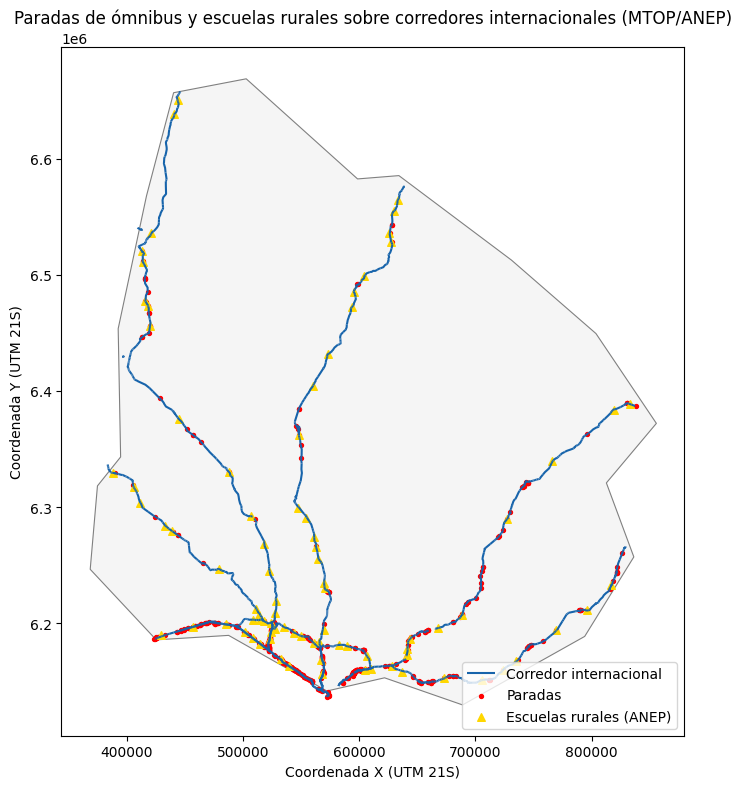

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1) Cargar Uruguay desde Natural Earth (mirror S3)
# ---------------------------
url_uruguay = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url_uruguay)
uruguay = world[world["ADMIN"] == "Uruguay"]
uruguay_32721 = uruguay.to_crs(32721)

# ---------------------------
# 2) Corredores, paradas y escuelas en 32721
# ---------------------------

roads_valid = cam_corr_m[cam_corr_m.geometry.is_valid].copy()
paradas_valid = paradas_corr_near[paradas_corr_near.geometry.is_valid].copy()
escuelas_valid = escuelas_corr_near[escuelas_corr_near.geometry.is_valid].copy()

azules = sns.color_palette("Blues", 4).as_hex()

# ---------------------------
# 3) Plot
# ---------------------------
fig, ax = plt.subplots(figsize=(10, 8))

# Uruguay base
uruguay_32721.plot(
    ax=ax,
    color="whitesmoke",
    edgecolor="gray",
    linewidth=0.8,
    label="Uruguay"
)

# Corredores
roads_valid.plot(
    ax=ax,
    color=azules[3],
    linewidth=1.5,
    label="Corredor internacional"
)

# Paradas
paradas_valid.plot(
    ax=ax,
    color="red",
    markersize=8,
    label="Paradas"
)

# Escuelas rurales cerca de corredores
escuelas_valid.plot(
    ax=ax,
    marker="^",
    markersize=30,
    color="gold",
    label="Escuelas rurales (ANEP)"
)

# ---------------------------
# 4) Ajuste de límites
# ---------------------------
xmin_u, ymin_u, xmax_u, ymax_u = uruguay_32721.total_bounds
xmin_r, ymin_r, xmax_r, ymax_r = roads_valid.total_bounds
xmin_p, ymin_p, xmax_p, ymax_p = paradas_valid.total_bounds
xmin_e, ymin_e, xmax_e, ymax_e = escuelas_valid.total_bounds

xmin = min(xmin_u, xmin_r, xmin_p, xmin_e)
xmax = max(xmax_u, xmax_r, xmax_p, xmax_e)
ymin = min(ymin_u, ymin_r, ymin_p, ymin_e)
ymax = max(ymax_u, ymax_r, ymax_p, ymax_e)

pad_x = (xmax - xmin) * 0.05
pad_y = (ymax - ymin) * 0.05

ax.set_xlim(xmin - pad_x, xmax + pad_x)
ax.set_ylim(ymin - pad_y, ymax + pad_y)

ax.set_aspect("equal")
ax.set_title("Paradas de ómnibus y escuelas rurales sobre corredores internacionales (MTOP/ANEP)")
ax.set_xlabel("Coordenada X (UTM 21S)")
ax.set_ylabel("Coordenada Y (UTM 21S)")
ax.legend(loc="lower right")

plt.tight_layout()
plt.show()


In [ ]:
ROUTE_COL = "numero"  # si se llama distinto, ajustá acá

# 1) Escuelas en 32721
escuelas_rurales_32721 = escuelas

# 2) Buffer de corredores, SIN perder el número de ruta
BUFFER_DIST = 1000  # metros, ajustable

corr_buffer = cam_corr_m[[ROUTE_COL, "geometry"]].copy()
corr_buffer["geometry"] = corr_buffer.buffer(BUFFER_DIST)

# 3) Spatial join: escuelas dentro del buffer de corredores
escuelas_corr_near = gpd.sjoin(
    escuelas_rurales_32721,
    corr_buffer,
    how="inner",
    predicate="intersects"
).drop(columns=["index_right"])

print("Columnas de escuelas_corr_near:")
escuelas_corr_near


Columnas de escuelas_corr_near:


OBJECTID Rule_ Subsistema            Nombre  NUmero   Area  \
319      15589  None      DGEIP              None      41  RURAL   
319      15589  None      DGEIP              None      41  RURAL   
336      15606  None      DGEIP              None      64  RURAL   
336      15606  None      DGEIP              None      64  RURAL   
336      15606  None      DGEIP              None      64  RURAL   
...        ...   ...        ...               ...     ...    ...   
2086     17356  None      DGEIP              None     131  RURAL   
2086     17356  None      DGEIP              None     131  RURAL   
2086     17356  None      DGEIP              None     131  RURAL   
2115     17385  None      DGEIP  PEQUEÑO DIONISIO       4  RURAL   
2115     17385  None      DGEIP  PEQUEÑO DIONISIO       4  RURAL   

            Tipo_de_Ed  Turno      Direccion NroPuerta  ...  Foto Novedades  \
319   ESCUELAS COMUNES  RURAL           None      None  ...  None      None   
319   ESCUELAS COMUNES  RURAL           None      None  ...  None      None   
336   ESCUELAS COMUNES  RURAL  RUTA NACIONAL   No.3 km  ...  None      None   
336   ESCUELAS COMUNES  RURAL  RUTA NACIONAL   No.3 km  ...  None      None   
336   ESCUELAS COMUNES  RURAL  RUTA NACIONAL   No.3 km  ...  None      None   
...                ...    ...            ...       ...  ...   ...       ...   
2086  ESCUELAS COMUNES  RURAL              5   383,900  ...  None      None   
2086  ESCUELAS COMUNES  RURAL              5   383,900  ...  None      None   
2086  ESCUELAS COMUNES  RURAL              5   383,900  ...  None      None   
2115  ESCUELAS COMUNES  RURAL         RUTA18       319  ...  None      None   
2115  ESCUELAS COMUNES  RURAL         RUTA18       319  ...  None      None   

     TMGrupo_Ei     RUEE PNOfrece2         x          y      rule1  \
319        None  1102041         3  444423.0  6650032.0  2020040.0   
319        None  1102041         3  444423.0  6650032.0  2020040.0   
336        None  1102064         3  440925.0  6637919.0  2020058.0   
336        None  1102064         3  440925.0  6637919.0  2020058.0   
336        None  1102064         3  440925.0  6637919.0  2020058.0   
...         ...      ...       ...       ...        ...        ...   
2086       None  1118131         4  595237.0  6485498.0  2180120.0   
2086       None  1118131         4  595237.0  6485498.0  2180120.0   
2086       None  1118131         4  595237.0  6485498.0  2180120.0   
2115       None  1119004         5  765917.0  6339681.0  2190004.0   
2115       None  1119004         5  765917.0  6339681.0  2190004.0   

                    geometry  numero  
319   POINT (444423 6650032)     3.0  
319   POINT (444423 6650032)     3.0  
336   POINT (440925 6637919)     3.0  
336   POINT (440925 6637919)     3.0  
336   POINT (440925 6637919)     3.0  
...                      ...     ...  
2086  POINT (595237 6485498)     5.0  
2086  POINT (595237 6485498)     5.0  
2086  POINT (595237 6485498)     5.0  
2115  POINT (765917 6339681)    18.0  
2115  POINT (765917 6339681)    18.0  

[438 rows x 33 columns]

In [ ]:
# Resetear índice para tener un id de escuela
escuelas_ruta = escuelas_corr_near.reset_index().rename(columns={"index": "id_escuela"})

# Evitar duplicados escuela–ruta
escuelas_ruta_unique = escuelas_ruta.drop_duplicates(
    subset=[ROUTE_COL, "id_escuela"]
)

# Conteo por ruta
escuelas_por_ruta = (
    escuelas_ruta_unique
    .groupby(ROUTE_COL)
    .size()
    .reset_index(name="cantidad_escuelas")
    .sort_values("cantidad_escuelas", ascending=False)
)

escuelas_por_ruta


print(f"Total escuelas rurales: {len(escuelas_rurales_32721)}")
print(f"Escuelas rurales cerca de corredores (sin duplicados): {len(escuelas_por_ruta)}")

Total escuelas rurales: 1029
Escuelas rurales cerca de corredores (sin duplicados): 11


In [ ]:
import geopandas as gpd
import pandas as pd

# Parámetros
ROUTE_COL = "numero"   # cambialo si tu columna de ruta se llama distinto
BUFFER_DIST = 1000     # metros: qué consideramos "cerca del corredor"

# 1) Asegurar CRS consistente
cam_corr_32721 = camineria_corredores.to_crs(32721)   # corredores internacionales
escuelas_32721 =escuelas         # escuelas rurales ANEP

# 2) Nos quedamos con número de ruta + geometría y quitamos rutas sin número
corredores = cam_corr_32721[[ROUTE_COL, "geometry"]].dropna(subset=[ROUTE_COL]).copy()

# 3) Disolver por número de ruta → una geometría por corredor
corredores_diss = corredores.dissolve(by=ROUTE_COL).reset_index()

# 4) Hacer buffer alrededor de cada ruta (para captar escuelas "cerca")
corredores_diss["geometry"] = corredores_diss.buffer(BUFFER_DIST)

# 5) Spatial join: cada escuela hereda la ruta del corredor cuyo buffer la contiene
escuelas_con_ruta = gpd.sjoin(
    escuelas_32721,                      # puntos
    corredores_diss[[ROUTE_COL, "geometry"]],  # buffers por ruta
    how="inner",
    predicate="intersects"
).drop(columns=["index_right"])

print(f"Total escuelas rurales: {len(escuelas_32721)}")
print(f"Escuelas rurales cerca de corredores (con ruta asignada): {len(escuelas_con_ruta)}")


Total escuelas rurales: 1029
Escuelas rurales cerca de corredores (con ruta asignada): 89


In [ ]:
import geopandas as gpd
import pandas as pd

def intersecciones_corredores_camineria(camineria, categoria_corredor="CORREDOR INTERNACIONAL"):
    """
    Calcula puntos de intersección entre los corredores internacionales y
    el resto de la caminería nacional.

    Devuelve:
      - intersections_gdf: GeoDataFrame con puntos de intersección y columnas:
            ruta_corredor, ruta_otra
      - tabla_intersecciones: DataFrame con cantidad de intersecciones por ruta_corredor
    """
    # Asegurar que tenemos geometrías válidas
    camineria = camineria[camineria.geometry.notna()].copy()
    camineria = camineria[camineria.geometry.is_valid].copy()

    # Separar corredores y resto
    corredores = camineria[camineria["categoria"] == categoria_corredor].copy()
    otras = camineria[camineria["categoria"] != categoria_corredor].copy()

    # Reseteo de índices para tener IDs explícitos
    corredores = corredores.reset_index().rename(columns={"index": "id_corr"})
    otras = otras.reset_index().rename(columns={"index": "id_otra"})

    # Spatial join para encontrar pares de tramos que se intersectan
    # Usamos 'intersects' como filtro grueso
    pairs = gpd.sjoin(
        otras[["id_otra", "numero", "geometry"]],
        corredores[["id_corr", "numero", "geometry"]],
        how="inner",
        predicate="intersects",
        lsuffix="_otra",
        rsuffix="_corredor",
    ).drop(columns=["index_right"])

    # Para evitar múltiple conteo por subdivisión de tramos,
    # nos quedamos con pares únicos (id_otra, id_corr)
    pairs_unique = pairs.drop_duplicates(subset=["id_otra", "id_corr"])

    inter_geoms = []
    ruta_corr_list = []
    ruta_otra_list = []

    # Calcular la intersección geométrica para cada par
    for _, row in pairs_unique.iterrows():
        g1 = row["geometry_otra"]
        g2 = row["geometry_corredor"]
        inter = g1.intersection(g2)
        if not inter.is_empty:
            # Si no es un punto (MultiPoint, LineString, etc.), tomamos un punto representativo
            if inter.geom_type == "Point":
                inter_point = inter
            else:
                inter_point = inter.representative_point()
            inter_geoms.append(inter_point)
            ruta_corr_list.append(row["numero_corredor"])
            ruta_otra_list.append(row["numero_otra"])

    intersections_gdf = gpd.GeoDataFrame(
        {
            "ruta_corredor": ruta_corr_list,
            "ruta_otra": ruta_otra_list,
        },
        geometry=inter_geoms,
        crs=camineria.crs,
    )

    # Tabla resumen: cantidad de intersecciones por ruta de corredor
    tabla_intersecciones = (
        intersections_gdf
        .groupby("ruta_corredor")
        .size()
        .reset_index(name="cantidad_intersecciones")
        .sort_values("cantidad_intersecciones", ascending=False)
    )

    return intersections_gdf, tabla_intersecciones


In [ ]:
import geopandas as gpd
import pandas as pd

def intersecciones_corredores_camineria(camineria, categoria_corredor="CORREDOR INTERNACIONAL"):
    """
    Calcula puntos de intersección entre los corredores internacionales y
    el resto de la caminería nacional.

    Devuelve:
      - intersections_gdf: GeoDataFrame con puntos de intersección y columnas:
            ruta_corredor, ruta_otra
      - tabla_intersecciones: DataFrame con cantidad de intersecciones por ruta_corredor
    """
    # Asegurar que tenemos geometrías válidas
    camineria = camineria[camineria.geometry.notna()].copy()
    camineria = camineria[camineria.geometry.is_valid].copy()

    # Separar corredores y resto
    corredores = camineria[camineria["categoria"] == categoria_corredor].copy()
    otras = camineria[camineria["categoria"] != categoria_corredor].copy()

    # Reseteo de índices para tener IDs explícitos
    corredores = corredores.reset_index().rename(columns={"index": "id_corr"})
    otras = otras.reset_index().rename(columns={"index": "id_otra"})

    # Spatial join para encontrar pares de tramos que se intersectan
    # La columna de geometría del GeoDataFrame de la izquierda (`otras`) se conserva como 'geometry'.
    # La columna de geometría del GeoDataFrame de la derecha (`corredores`) NO se incluye por defecto.
    # Por lo tanto, pasamos solo las columnas no geométricas de 'corredores' a sjoin.
    pairs = gpd.sjoin(
        otras[["id_otra", "numero", "geometry"]],
        corredores[["id_corr", "numero"]], # Seleccionamos solo columnas no geométricas del GeoDataFrame de la derecha
        how="inner",
        predicate="intersects",
        lsuffix="_otra",
        rsuffix="_corredor",
    ).drop(columns=["index_right"], errors='ignore')

    # La columna 'geometry' en `pairs` es la geometría de las características de 'otras' (izquierda).

    # Para evitar el conteo múltiple por subdivisión de tramos,
    # nos quedamos con pares únicos (id_otra, id_corr)
    pairs_unique = pairs.drop_duplicates(subset=["id_otra", "id_corr"])

    inter_geoms = []
    ruta_corr_list = []
    ruta_otra_list = []

    # Preparamos una Serie para una búsqueda rápida de las geometrías de los corredores
    corredores_geom_lookup = corredores.set_index("id_corr")["geometry"]

    # Calcular la intersección geométrica para cada par
    for _, row in pairs_unique.iterrows():
        g1 = row["geometry"] # Geometría de la "otra" carretera
        id_corr_val = row["id_corr"]
        g2 = corredores_geom_lookup.loc[id_corr_val] # Geometría de la carretera "corredor"

        inter = g1.intersection(g2)
        if not inter.is_empty:
            # Si no es un punto (MultiPoint, LineString, etc.), tomamos un punto representativo
            if inter.geom_type == "Point":
                inter_point = inter
            elif inter.geom_type == "MultiPoint":
                # Para MultiPoint, toma el primer punto o uno representativo
                inter_point = inter.geoms[0] if inter.geoms else None
            else:
                inter_point = inter.representative_point()

            if inter_point: # Solo adjunta si se derivó un punto con éxito
                inter_geoms.append(inter_point)
                ruta_corr_list.append(row["numero_corredor"])
                ruta_otra_list.append(row["numero_otra"])

    intersections_gdf = gpd.GeoDataFrame(
        {
            "ruta_corredor": ruta_corr_list,
            "ruta_otra": ruta_otra_list,
        },
        geometry=inter_geoms,
        crs=camineria.crs,
    )

    # Tabla resumen: cantidad de intersecciones por ruta de corredor
    tabla_intersecciones = (
        intersections_gdf
        .groupby("ruta_corredor")
        .size()
        .reset_index(name="cantidad_intersecciones")
        .sort_values("cantidad_intersecciones", ascending=False)
    )

    return intersections_gdf, tabla_intersecciones

camineria_nacional_path = "/content/drive/MyDrive/Tesis/Datos/v_camineria_nacional.shp"
camineria = gpd.read_file(camineria_nacional_path).to_crs(32721)

intersections_gdf, tabla_intersecciones = intersecciones_corredores_camineria(camineria)

print(tabla_intersecciones.head())


ValueError: 'right_df' should be GeoDataFrame, got <class 'pandas.core.frame.DataFrame'>

In [ ]:
camineria

gid     codigo  numero                        nombre depto  \
0      3344250  UY0110000    11.0         José Batlle y Ordoñez  UYCA   
1       349731  UY0110000    11.0         José Batlle y Ordoñez  UYCA   
2       292738  UY0270000    27.0                   Mario Heber  UYRV   
3       305834  UY0050000     5.0  Brig. Gral. Fructuoso Rivera  UYMO   
4      3343102   UYTA0284     NaN                          None  UYTA   
...        ...        ...     ...                           ...   ...   
40053  3353330   UYCA1009     NaN                          None  UYCA   
40054   337595   UYTT0027     NaN                      Tupambae  UYTT   
40055   330425   UYTT0041     NaN                          None  UYTT   
40056  3351867   UYMA0373     NaN                          None  UYMA   
40057  3348542   UYMA0343     NaN                    Paso Lopez  UYMA   

          jurisdicci                categoria  \
0           NACIONAL   CORREDOR INTERNACIONAL   
1           NACIONAL   CORREDOR INTERNACIONAL   
2           NACIONAL          RUTA SECUNDARIA   
3           NACIONAL   CORREDOR INTERNACIONAL   
4        SIN DEFINIR  CAMINERÍA DEPARTAMENTAL   
...              ...                      ...   
40053  DEPARTAMENTAL  CAMINERÍA DEPARTAMENTAL   
40054  DEPARTAMENTAL  CAMINERÍA DEPARTAMENTAL   
40055  DEPARTAMENTAL  CAMINERÍA DEPARTAMENTAL   
40056  DEPARTAMENTAL  CAMINERÍA DEPARTAMENTAL   
40057  DEPARTAMENTAL  CAMINERÍA DEPARTAMENTAL   

                                                 sentido carriles  \
0      EL SENTIDO DE CIRCULACIÓN COINCIDE CON EL DE D...        1   
1                          CIRCULACIÓN EN AMBOS SENTIDOS        2   
2                          CIRCULACIÓN EN AMBOS SENTIDOS        2   
3      EL SENTIDO DE CIRCULACIÓN COINCIDE CON EL DE D...        2   
4                          CIRCULACIÓN EN AMBOS SENTIDOS       99   
...                                                  ...      ...   
40053                      CIRCULACIÓN EN AMBOS SENTIDOS       99   
40054                      CIRCULACIÓN EN AMBOS SENTIDOS       99   
40055                      CIRCULACIÓN EN AMBOS SENTIDOS       99   
40056                      CIRCULACIÓN EN AMBOS SENTIDOS       99   
40057                      CIRCULACIÓN EN AMBOS SENTIDOS       99   

             calzada fuente observacio nat_juridi  \
0      SE VE CALZADA    VFN       7-11       None   
1      SE VE CALZADA    VFN       None       None   
2      SE VE CALZADA    VFN       None       None   
3      SE VE CALZADA    VFN       None       None   
4       SE VE HUELLA    VFN       None       None   
...              ...    ...        ...        ...   
40053  SE VE CALZADA    VFN       None       None   
40054  SE VE CALZADA    VFN       None       None   
40055  SE VE CALZADA    VFN       None       None   
40056  SE VE CALZADA    VFN       None       None   
40057  SE VE CALZADA    VFN       None       None   

                                                geometry  
0      LINESTRING (603407.562 6176572.362, 603403.449...  
1      LINESTRING (589503.245 6180359.24, 589339.775 ...  
2      LINESTRING (643366.875 6565395.316, 645715.986...  
3      LINESTRING (566354.269 6150606.713, 566350.475...  
4      LINESTRING (605505.804 6481561.686, 605510.1 6...  
...                                                  ...  
40053  LINESTRING (594503.229 6179893.358, 594498.862...  
40054  LINESTRING (710312.329 6335598.51, 710343.567 ...  
40055  LINESTRING (721747.995 6358043.702, 721724.659...  
40056  LINESTRING (705850.289 6184851.502, 705858.203...  
40057  LINESTRING (701613.233 6175916.451, 701648.809...  

[40058 rows x 14 columns]

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#-----------------------------
# 0) Asegurar CRS y datos base
#-----------------------------
# camineria: caminería nacional completa
# cam_corr_m: solo corredores internacionales (ya filtrados antes)
# paradas_corr_near: paradas sobre corredores

camineria_32721 = camineria.to_crs(32721)
cam_corr_32721 = cam_corr_m.to_crs(32721)
paradas_32721 = paradas_corr_near.to_crs(32721)

# Limpiamos geometrías inválidas
camineria_32721 = camineria_32721[camineria_32721.geometry.notna() & camineria_32721.geometry.is_valid]
cam_corr_32721 = cam_corr_32721[cam_corr_32721.geometry.notna() & cam_corr_32721.geometry.is_valid]

#-----------------------------
# 1) Función: intersecciones por ruta de corredor
#-----------------------------
def intersecciones_corredor_camineria(cam_corr, camineria, route_col="numero"):
    """
    Para cada ruta de corredor (route_col en cam_corr),
    intersecta la geometría completa de esa ruta con TODA la caminería nacional
    y devuelve:
      - GeoDataFrame con puntos de intersección
      - DataFrame con cantidad de intersecciones por ruta de corredor
    """
    inter_points = []
    ruta_corr_list = []
    ruta_otra_list = []
    cat_otra_list = []

    # Valores únicos de número de ruta en los corredores
    rutas = sorted(cam_corr[route_col].dropna().unique())

    for ruta in rutas:
        # Geometría completa de esa ruta (unary_union de todos sus tramos)
        geom_ruta = cam_corr.loc[cam_corr[route_col] == ruta, "geometry"].unary_union

        # Recorremos TODA la caminería
        for idx, row in camineria.iterrows():
            geom2 = row.geometry
            if geom2 is None or geom2.is_empty:
                continue

            # Opcional: evitar contar "intersecciones consigo misma"
            if row.get("categoria") == "CORREDOR INTERNACIONAL" and row.get(route_col) == ruta:
                continue

            inter = geom_ruta.intersection(geom2)
            if inter.is_empty:
                continue

            # Normalizamos: siempre obtenemos una lista de puntos
            pts = []
            if inter.geom_type == "Point":
                pts = [inter]
            elif inter.geom_type == "MultiPoint":
                pts = list(inter.geoms)
            else:
                # LineString / MultiLineString / GeometryCollection → punto representativo
                pts = [inter.representative_point()]

            for pt in pts:
                inter_points.append(pt)
                ruta_corr_list.append(ruta)
                ruta_otra_list.append(row.get(route_col))
                cat_otra_list.append(row.get("categoria"))

    intersections_gdf = gpd.GeoDataFrame(
        {
            "ruta_corredor": ruta_corr_list,
            "ruta_otra": ruta_otra_list,
            "categoria_otra": cat_otra_list,
        },
        geometry=inter_points,
        crs=camineria.crs,
    )

    # Tabla resumen: cantidad de intersecciones por ruta de corredor
    tabla_inter = (
        intersections_gdf
        .groupby("ruta_corredor")
        .size()
        .reset_index(name="cantidad_intersecciones")
        .sort_values("cantidad_intersecciones", ascending=False)
    )

    return intersections_gdf, tabla_inter

# Ejecutar la función
intersections_gdf, tabla_intersecciones = intersecciones_corredor_camineria(
    cam_corr_32721,
    camineria_32721,
    route_col="numero"
)

tabla_intersecciones


/tmp/ipython-input-727637712.py:42: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom_ruta = cam_corr.loc[cam_corr[route_col] == ruta, "geometry"].unary_union


ruta_corredor  cantidad_intersecciones
1             1.0                      692
4             5.0                      565
3             3.0                      456
5             8.0                      388
6             9.0                      369
7            11.0                      314
2             2.0                      147
11           18.0                       57
13           23.0                       48
8            12.0                       25
0             0.0                       22
10           17.0                       21
14           24.0                       11
9            14.0                       10
16           30.0                        9
15           26.0                        7
12           20.0                        4
17        90011.0                        4

NameError: name 'xmin_i' is not defined

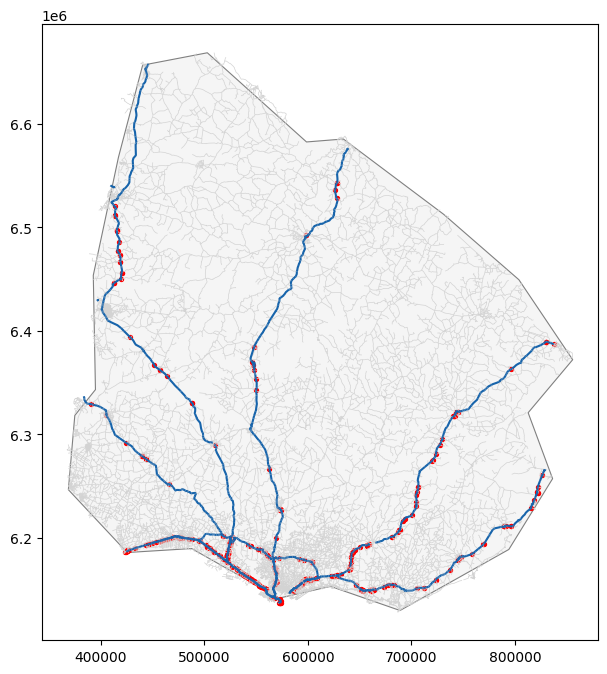

In [ ]:

#-----------------------------
# 2) Mapa: corredores + paradas + caminería + intersecciones
#-----------------------------
# 1) Cargar Uruguay desde Natural Earth (mirror S3)
url_uruguay = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url_uruguay)
uruguay = world[world["ADMIN"] == "Uruguay"]
uruguay_32721 = uruguay.to_crs(32721)

# Corredores y paradas en 32721
roads_valid = cam_corr_32721[cam_corr_32721.geometry.is_valid].copy()
paradas_valid = paradas_32721[paradas_32721.geometry.is_valid].copy()
intersections_valid = intersections_gdf[intersections_gdf.geometry.is_valid].copy()

azules = sns.color_palette("Blues", 4).as_hex()

fig, ax = plt.subplots(figsize=(10, 8))

# Uruguay base
uruguay_32721.plot(
    ax=ax,
    color="whitesmoke",
    edgecolor="gray",
    linewidth=0.8,
    label="Uruguay"
)

# Caminería nacional en gris claro
camineria_32721.plot(
    ax=ax,
    linewidth=0.5,
    color="lightgray",
    label="Caminería nacional"
)

# Corredores
roads_valid.plot(
    ax=ax,
    color=azules[3],
    linewidth=1.5,
    label="Corredor internacional"
)

# Paradas
paradas_valid.plot(
    ax=ax,
    color="red",
    markersize=8,
    label="Paradas"
)



# Ajuste de límites
xmin_u, ymin_u, xmax_u, ymax_u = uruguay_32721.total_bounds
xmin_r, ymin_r, xmax_r, ymax_r = roads_valid.total_bounds
xmin_p, ymin_p, xmax_p, ymax_p = paradas_valid.total_bounds


xmin = min(xmin_u, xmin_r, xmin_p, xmin_i)
xmax = max(xmax_u, xmax_r, xmax_p, xmax_i)
ymin = min(ymin_u, ymin_r, ymin_p, ymin_i)
ymax = max(ymax_u, ymax_r, ymax_p, ymax_i)

pad_x = (xmax - xmin) * 0.05
pad_y = (ymax - ymin) * 0.05

ax.set_xlim(xmin - pad_x, xmax + pad_x)
ax.set_ylim(ymin - pad_y, ymax + pad_y)

ax.set_aspect("equal")
ax.set_title("Paradas, corredores internacionales e intersecciones con la caminería nacional (MTOP)")
ax.set_xlabel("Coordenada X (UTM 21S)")
ax.set_ylabel("Coordenada Y (UTM 21S)")
ax.legend(loc="lower right")

plt.tight_layout()
plt.show()


In [ ]:
# =========================
# 0) Parámetros
# =========================
METRIC_CRS = 32721      # UTM 21S
MAX_KM = 10             # radio máximo de influencia
LOCALIDADES_PATH = "/content/drive/MyDrive/Tesis/Datos/merged_localidades.csv"

def ensure_metric_crs(gdf, metric_crs=METRIC_CRS):
    """Asegura que el GeoDataFrame esté en el CRS métrico requerido."""
    if gdf.crs is None:
        raise ValueError("GeoDataFrame sin CRS. Asigná/reproyectá antes.")
    return gdf if gdf.crs.to_epsg() == metric_crs else gdf.to_crs(epsg=metric_crs)

# =========================
# 1) Paradas (ya en UTM 21S)
# =========================
gdf_paradas = paradas_corr_near.copy()
gdf_paradas = ensure_metric_crs(gdf_paradas)
gdf_paradas = gdf_paradas[gdf_paradas.geometry.type == "Point"].copy()

# =========================
# 2) Rutas - Filtrar solo corredores internacionales
# =========================
roads_int = cam_corr_m[
    cam_corr_m["categoria"] == "CORREDOR INTERNACIONAL"
].copy()

roads_int = ensure_metric_crs(roads_int)

# Unir todos los corredores en una sola geometría
corredores_union = roads_int.unary_union

# =========================
# 3) Localidades
# =========================
loc = pd.read_csv(LOCALIDADES_PATH).rename(columns={"size": "poblacion"})
loc.dropna(subset=["LON", "LAT"], inplace=True)

# Convertir a GeoDataFrame
gdf_loc = gpd.GeoDataFrame(
    loc,
    geometry=gpd.points_from_xy(loc["LON"], loc["LAT"]),
    crs=4326
).to_crs(METRIC_CRS)

# Distancia a corredores internacionales
gdf_loc["dist_corredor_m"] = gdf_loc.geometry.distance(corredores_union)

# Filtrar a <= 10 km
gdf_loc_valid = gdf_loc[gdf_loc["dist_corredor_m"] <= MAX_KM * 1000].copy()

print(f"Localidades dentro de {MAX_KM} km de corredores internacionales: "
      f"{len(gdf_loc_valid)} / {len(gdf_loc)}")

# Esta será la capa final para el mapa:
localidades_cercanas = gdf_loc_valid


In [ ]:
loc

LOCALIDAD_CODE  DEPARTAMENTO  poblacion  DPTOLOC_COD          LOC_NOMBRE  \
0              1020             1    1287452         1020          MONTEVIDEO   
1             15120            15     114084        15120               SALTO   
2             10020            10     102000        10020           MALDONADO   
3             13020            13      84775        13020              RIVERA   
4             11120            11      81550        11120            PAYSANDU   
..              ...           ...        ...          ...                 ...   
491            3991             3        105         3991         VILLA JUANA   
492           14926            14        104        14926       BARRIO TORRES   
493            5964             5        102         5964       PUERTO INGLES   
494            3996             3        102         3996  QUINTAS DEL BOSQUE   
495            5927             5        100         5927          EL ENSUEÑO   

     DPTO_CODIGO DPTO_NOMBRE        LAT        LON  
0              1  Montevideo -34.905892 -56.191310  
1             15       Salto -31.388890 -57.960888  
2             10   Maldonado -34.908716 -54.958272  
3             13      Rivera -30.900058 -55.540815  
4             11    Paysandú -32.321726 -58.089214  
..           ...         ...        ...        ...  
491            3   Canelones -34.776172 -55.894037  
492           14       Rocha -34.211784 -53.845592  
493            5     Colonia -34.203277 -58.066059  
494            3   Canelones -34.819497 -55.990500  
495            5     Colonia -34.421706 -57.603166  

[462 rows x 9 columns]

In [ ]:
conditions = [
    localidades_cercanas["poblacion"] < 2000,
    (localidades_cercanas["poblacion"] >= 2000) & (localidades_cercanas["poblacion"] < 5000),
    (localidades_cercanas["poblacion"] >= 5000) & (localidades_cercanas["poblacion"] < 10000),
    localidades_cercanas["poblacion"] >= 10000
]

choices = ["localidad", "pueblo", "villa", "ciudad"]

localidades_cercanas["categoria"] = np.select(conditions, choices, default="sin_dato")


In [ ]:
marker_sizes = {
    "localidad": 20,
    "pueblo": 50,
    "villa": 100,
    "ciudad": 200,
}

localidades_cercanas["marker_size"] = localidades_cercanas["categoria"].map(marker_sizes)


/tmp/ipython-input-1812033570.py:40: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  roads_valid[roads_valid["categoria"]=="RUTA PRIMARIA"].plot(
/tmp/ipython-input-1812033570.py:43: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  roads_valid[roads_valid["categoria"]=="RUTA SECUNDARIA"].plot(
/tmp/ipython-input-1812033570.py:46: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  roads_valid[roads_valid["categoria"]=="RUTA TERCIARIA"].plot(
/tmp/ipython-input-1812033570.py:84: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc="upper right")


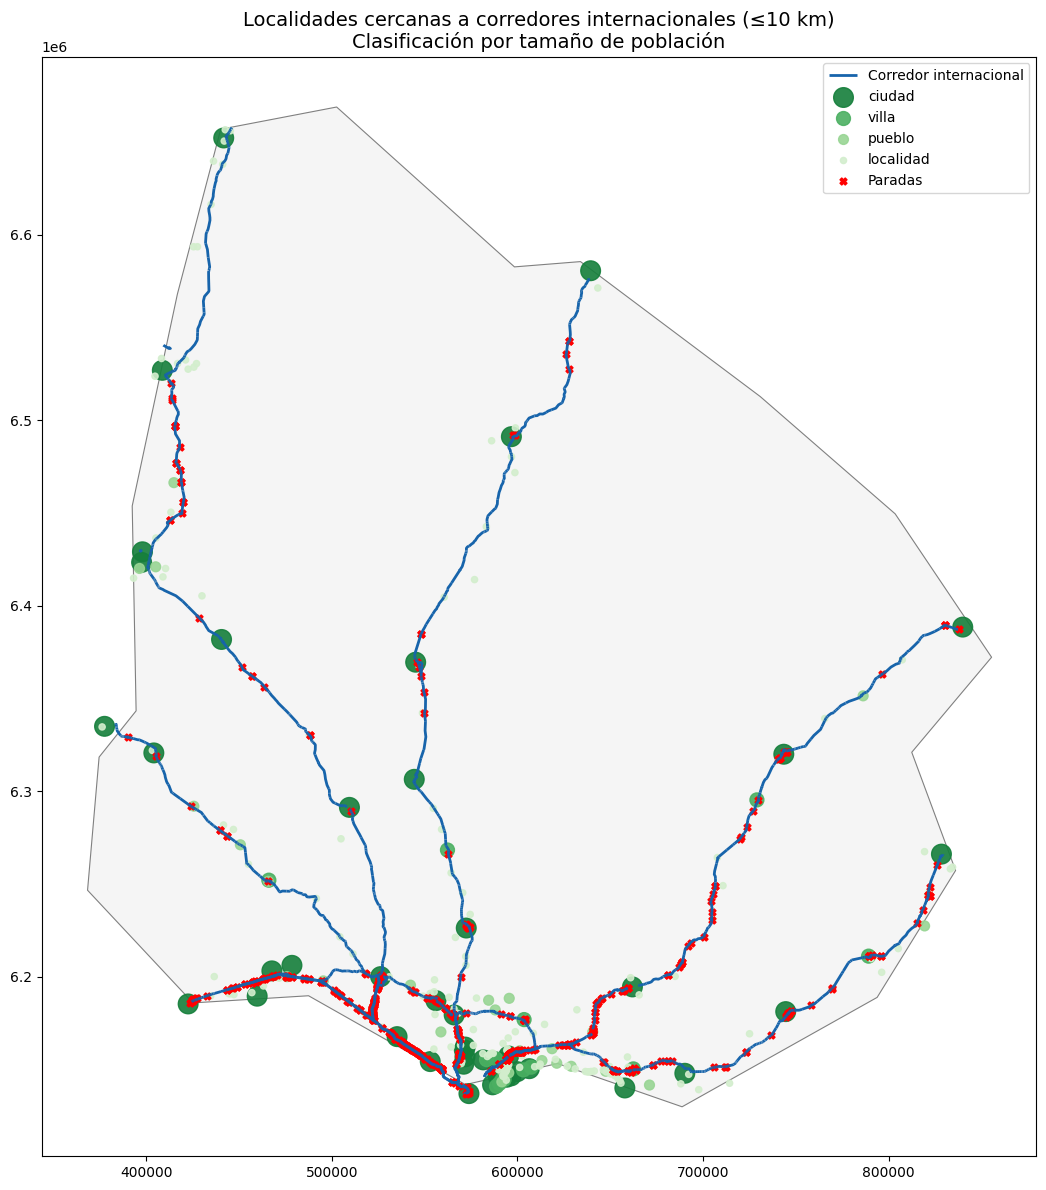

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

# ---------------------------
# 0) Colores
# ---------------------------
greens = sns.color_palette("Greens", 4).as_hex()
marker_colors = {
    "ciudad":    greens[3],  # más oscuro
    "villa":     greens[2],
    "pueblo":    greens[1],
    "localidad": greens[0],  # más claro
}

marker_sizes = {
    "localidad": 20,
    "pueblo":    50,
    "villa":     100,
    "ciudad":    200,
}

localidades_cercanas["marker_size"] = localidades_cercanas["categoria"].map(marker_sizes)

# ---------------------------
# 1) Uruguay de fondo
# ---------------------------
uruguay_32721.plot(
    ax=ax,
    color="whitesmoke",
    edgecolor="gray",
    linewidth=0.8,
    label="Uruguay"
)

# ---------------------------
# 2) Red vial
# ---------------------------
roads_valid[roads_valid["categoria"]=="CORREDOR INTERNACIONAL"].plot(
    ax=ax, color=azules[3], linewidth=2, label="Corredor internacional"
)
roads_valid[roads_valid["categoria"]=="RUTA PRIMARIA"].plot(
    ax=ax, color=azules[2], linewidth=1.8, label="Ruta primaria"
)
roads_valid[roads_valid["categoria"]=="RUTA SECUNDARIA"].plot(
    ax=ax, color=azules[1], linewidth=1.5, label="Ruta secundaria"
)
roads_valid[roads_valid["categoria"]=="RUTA TERCIARIA"].plot(
    ax=ax, color=azules[0], linewidth=1.2, label="Ruta terciaria"
)

# ---------------------------
# 3) Localidades (verdes)
# ---------------------------
for cat in ["ciudad", "villa", "pueblo", "localidad"]:
    sub = localidades_cercanas[localidades_cercanas["categoria"] == cat]
    if len(sub) > 0:
        sub.plot(
            ax=ax,
            markersize=sub["marker_size"],
            color=marker_colors[cat],
            alpha=0.9,
            label=cat
        )

# ---------------------------
# 4) Paradas (rojo)
# ---------------------------
gdf_paradas.plot(
    ax=ax,
    marker="X",
    color="red",
    markersize=25,
    label="Paradas"
)

# ---------------------------
# 5) Detalles finales
# ---------------------------
ax.set_title(
    "Localidades cercanas a corredores internacionales (≤10 km)\n"
    "Clasificación por tamaño de población",
    fontsize=14
)
ax.set_aspect("equal")
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


/tmp/ipython-input-940872583.py:45: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  roads_valid[roads_valid["categoria"] == "RUTA PRIMARIA"].plot(
/tmp/ipython-input-940872583.py:51: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  roads_valid[roads_valid["categoria"] == "RUTA SECUNDARIA"].plot(
/tmp/ipython-input-940872583.py:57: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  roads_valid[roads_valid["categoria"] == "RUTA TERCIARIA"].plot(
/tmp/ipython-input-940872583.py:106: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc="upper right")


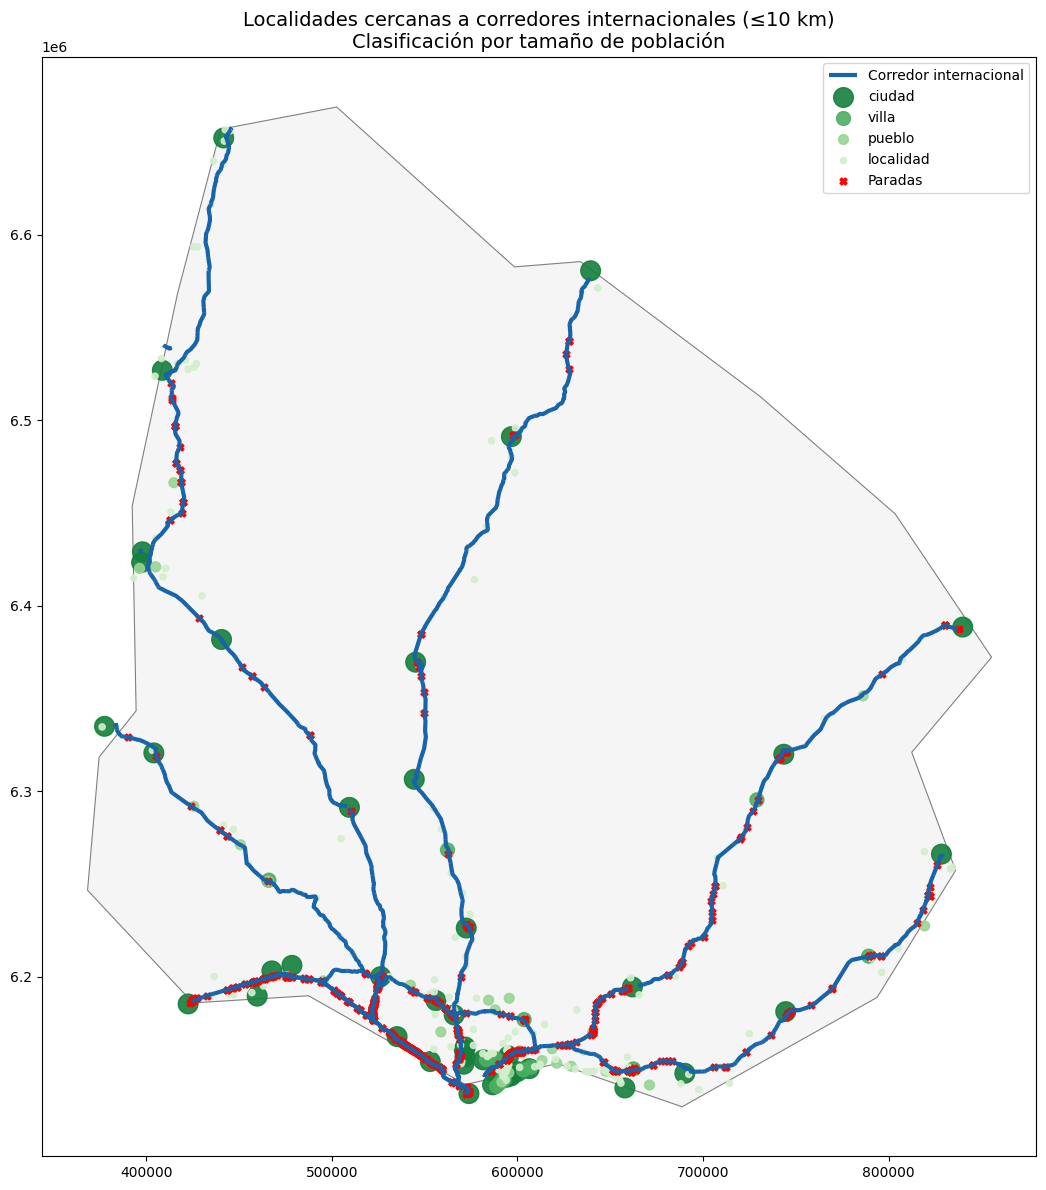

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

# ---------------------------
# 0) Paletas de colores
# ---------------------------
greens = sns.color_palette("Greens", 4).as_hex()
azules = sns.color_palette("Blues", 4).as_hex()

marker_colors = {
    "ciudad":    greens[3],  # más oscuro
    "villa":     greens[2],
    "pueblo":    greens[1],
    "localidad": greens[0],  # más claro
}

marker_sizes = {
    "localidad": 20,
    "pueblo":    50,
    "villa":     100,
    "ciudad":    200,
}

localidades_cercanas["marker_size"] = localidades_cercanas["categoria"].map(marker_sizes)

# ---------------------------
# 1) Uruguay de fondo
# ---------------------------
uruguay_32721.plot(
    ax=ax,
    color="whitesmoke",
    edgecolor="gray",
    linewidth=0.8,
    label="Uruguay"
)

# ---------------------------
# 2) Red vial (todas las rutas)
# ---------------------------
roads_valid[roads_valid["categoria"] == "CORREDOR INTERNACIONAL"].plot(
    ax=ax,
    color=azules[3],
    linewidth=2,
    label=None     # sin label para no duplicar en la leyenda
)
roads_valid[roads_valid["categoria"] == "RUTA PRIMARIA"].plot(
    ax=ax,
    color=azules[2],
    linewidth=1.8,
    label="Ruta primaria"
)
roads_valid[roads_valid["categoria"] == "RUTA SECUNDARIA"].plot(
    ax=ax,
    color=azules[1],
    linewidth=1.5,
    label="Ruta secundaria"
)
roads_valid[roads_valid["categoria"] == "RUTA TERCIARIA"].plot(
    ax=ax,
    color=azules[0],
    linewidth=1.2,
    label="Ruta terciaria"
)

# 2 bis) Corredores internacionales resaltados (detalle)
roads_valid[roads_valid["categoria"] == "CORREDOR INTERNACIONAL"].plot(
    ax=ax,
    color=azules[3],
    linewidth=3,   # más grueso para destacarlo
    label="Corredor internacional"
)

# ---------------------------
# 3) Localidades (verdes)
# ---------------------------
for cat in ["ciudad", "villa", "pueblo", "localidad"]:
    sub = localidades_cercanas[localidades_cercanas["categoria"] == cat]
    if len(sub) > 0:
        sub.plot(
            ax=ax,
            markersize=sub["marker_size"],
            color=marker_colors[cat],
            alpha=0.9,
            label=cat
        )

# ---------------------------
# 4) Paradas (rojo)
# ---------------------------
gdf_paradas.plot(
    ax=ax,
    marker="X",
    color="red",
    markersize=25,
    label="Paradas"
)

# ---------------------------
# 5) Detalles finales
# ---------------------------
ax.set_title(
    "Localidades cercanas a corredores internacionales (≤10 km)\n"
    "Clasificación por tamaño de población",
    fontsize=14
)
ax.set_aspect("equal")
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


/tmp/ipython-input-3837680811.py:89: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc="upper right")


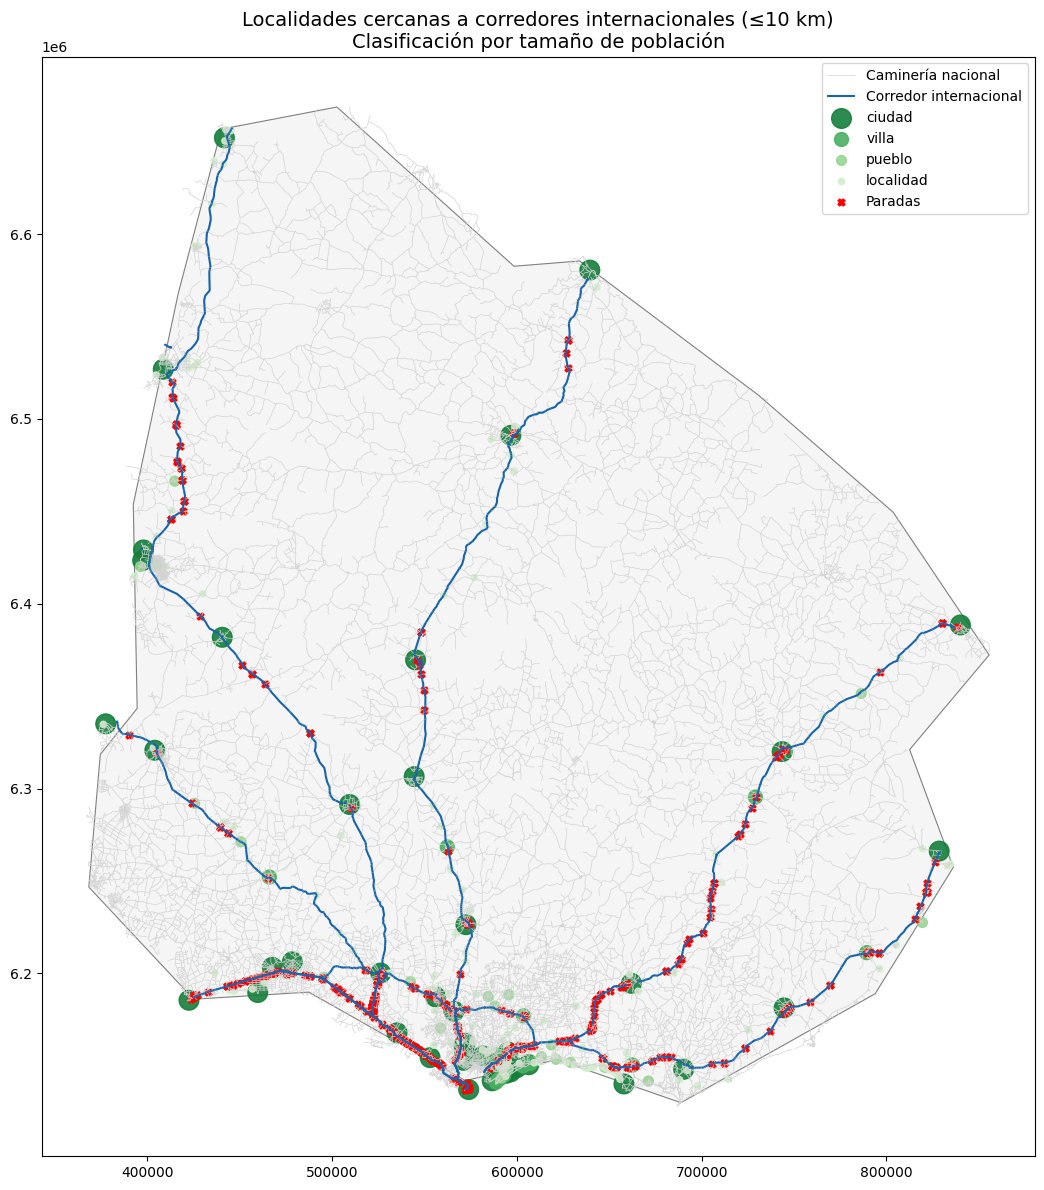

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

# ---------------------------
# 0) Paletas de colores
# ---------------------------
greens = sns.color_palette("Greens", 4).as_hex()
azules = sns.color_palette("Blues", 4).as_hex()

marker_colors = {
    "ciudad":    greens[3],  # más oscuro
    "villa":     greens[2],
    "pueblo":    greens[1],
    "localidad": greens[0],  # más claro
}

marker_sizes = {
    "localidad": 20,
    "pueblo":    50,
    "villa":     100,
    "ciudad":    200,
}

localidades_cercanas["marker_size"] = localidades_cercanas["categoria"].map(marker_sizes)

# ---------------------------
# 1) Uruguay de fondo
# ---------------------------
uruguay_32721.plot(
    ax=ax,
    color="whitesmoke",
    edgecolor="gray",
    linewidth=0.8,
    label="Uruguay"
)

# ---------------------------
# 2) Caminería nacional (detalle del 2º mapa)
# ---------------------------
camineria_32721.plot(
    ax=ax,
    linewidth=0.5,
    color="lightgray",
    label="Caminería nacional"
)

# Corredores internacionales (como en el 2º mapa)
roads_valid = cam_corr_32721[cam_corr_32721.geometry.is_valid].copy()
roads_valid.plot(
    ax=ax,
    color=azules[3],
    linewidth=1.5,
    label="Corredor internacional"
)

# ---------------------------
# 3) Localidades (verdes)
# ---------------------------
for cat in ["ciudad", "villa", "pueblo", "localidad"]:
    sub = localidades_cercanas[localidades_cercanas["categoria"] == cat]
    if len(sub) > 0:
        sub.plot(
            ax=ax,
            markersize=sub["marker_size"],
            color=marker_colors[cat],
            alpha=0.9,
            label=cat
        )

# ---------------------------
# 4) Paradas (rojo)
# ---------------------------
gdf_paradas.plot(
    ax=ax,
    marker="X",
    color="red",
    markersize=25,
    label="Paradas"
)

# ---------------------------
# 5) Detalles finales
# ---------------------------
ax.set_title(
    "Localidades cercanas a corredores internacionales (≤10 km)\n"
    "Clasificación por tamaño de población",
    fontsize=14
)
ax.set_aspect("equal")
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


/tmp/ipython-input-3144572829.py:102: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc="upper right", fontsize=9)


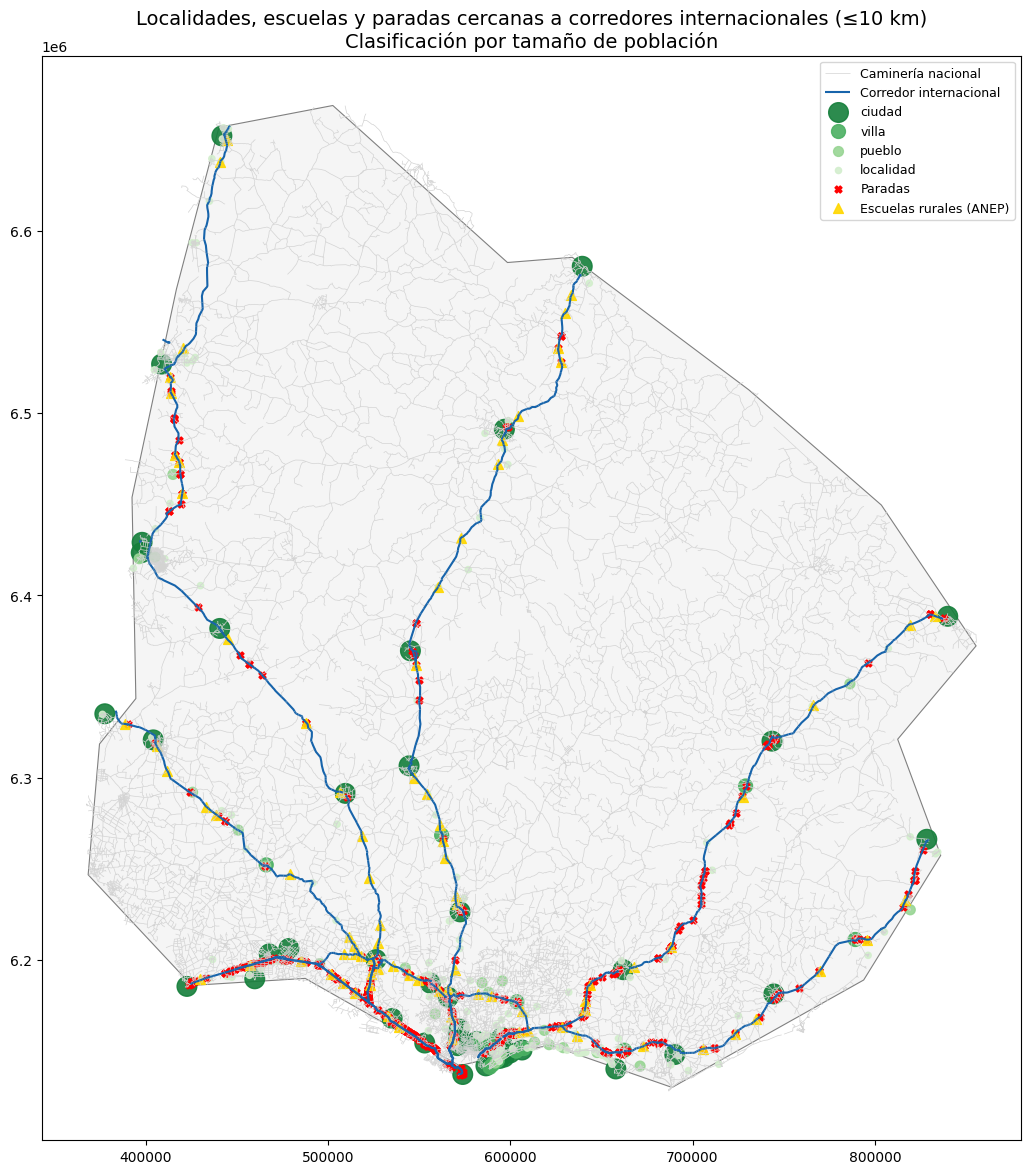

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

# ---------------------------
# 0) Paletas de colores
# ---------------------------
greens = sns.color_palette("Greens", 4).as_hex()
azules = sns.color_palette("Blues", 4).as_hex()

marker_colors = {
    "ciudad":    greens[3],  # más oscuro
    "villa":     greens[2],
    "pueblo":    greens[1],
    "localidad": greens[0],  # más claro
}

marker_sizes = {
    "localidad": 20,
    "pueblo":    50,
    "villa":     100,
    "ciudad":    200,
}

localidades_cercanas["marker_size"] = localidades_cercanas["categoria"].map(marker_sizes)

# ---------------------------
# 1) Uruguay de fondo
# ---------------------------
uruguay_32721.plot(
    ax=ax,
    color="whitesmoke",
    edgecolor="gray",
    linewidth=0.8,
    label="Uruguay"
)

# ---------------------------
# 2) Caminería nacional
# ---------------------------
camineria_32721.plot(
    ax=ax,
    linewidth=0.5,
    color="lightgray",
    label="Caminería nacional"
)

# Corredores internacionales
roads_valid = cam_corr_32721[cam_corr_32721.geometry.is_valid].copy()
roads_valid.plot(
    ax=ax,
    color=azules[3],
    linewidth=1.5,
    label="Corredor internacional"
)

# ---------------------------
# 3) Localidades (verdes)
# ---------------------------
for cat in ["ciudad", "villa", "pueblo", "localidad"]:
    sub = localidades_cercanas[localidades_cercanas["categoria"] == cat]
    if len(sub) > 0:
        sub.plot(
            ax=ax,
            markersize=sub["marker_size"],
            color=marker_colors[cat],
            alpha=0.9,
            label=cat
        )

# ---------------------------
# 4) Paradas (rojo)
# ---------------------------
gdf_paradas.plot(
    ax=ax,
    marker="X",
    color="red",
    markersize=25,
    label="Paradas"
)

# ---------------------------
# 5) Escuelas rurales ANEP (dorado)
# ---------------------------
escuelas_valid.plot(
    ax=ax,
    marker="^",
    markersize=50,   # <<--- antes 30
    color="gold",
    alpha=0.9,
    label="Escuelas rurales (ANEP)"
)

# ---------------------------
# 6) Detalles finales
# ---------------------------
ax.set_title(
    "Localidades, escuelas y paradas cercanas a corredores internacionales (≤10 km)\n"
    "Clasificación por tamaño de población",
    fontsize=14
)

ax.set_aspect("equal")
ax.legend(loc="upper right", fontsize=9)

plt.tight_layout()
plt.show()
